<h1>Action Recognition Under Varying Lighting Condition Using Deeplearning</h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Initial-Libraries-Import" data-toc-modified-id="Initial-Libraries-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial Libraries Import</a></span></li>
    <li><span><a href="#Global-Result-DataFrame-Initialization" data-toc-modified-id="Global-Result-DataFrame-Initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global Result DataFrame Initialization</a></span></li>
    <li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span>
      <ul class="toc-item">
        <li><span><a href="#Read-Video-Dataset" data-toc-modified-id="Read-Video-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read Video Dataset</a></span></li>
        <li><span><a href="#Visualization-of-Classes-present-in-dataset" data-toc-modified-id="Visualization-of-Classes-present-in-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualization of Classes present in dataset</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Denoising-Filters" data-toc-modified-id="Denoising-Filters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Denoising Filters</a></span></li>
    <li><span><a href="#Image-Enhancement" data-toc-modified-id="Image-Enhancement-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Image Enhancement</a></span>
    </li>
    <li><span><a href="#Common-Functions" data-toc-modified-id="Common-Functions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Common Functions</a></span>
      <ul class="toc-item">
        <li><span><a href="#get-pretrained-models" data-toc-modified-id="get-pretrained-models-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>get pretrained models</a></span></li>
        <li><span><a href="#Video-Transformer" data-toc-modified-id="Video-Transformer-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Video Transformer</a></span></li>
        <li><span><a href="#Video-frames-to-clips" data-toc-modified-id="Video-frames-to-clips-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Video frames to clips</a></span></li>
        <li><span><a href="#Inference-function" data-toc-modified-id="Inference-function-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Inference function</a></span></li>
        <li><span><a href="#Evaluation-Function" data-toc-modified-id="Evaluation-Function-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Evaluation Function</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Experiments" data-toc-modified-id="Experiments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Experiments</a></span>
      <ul class="toc-item">
        <li><span><a href="#Experiment-without-video-transformer-with-kinetics400-Weights" data-toc-modified-id="Experiment-without-video-transformer-with-kinetics400-Weights-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Experiment without video transformer with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-median-denoising-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-median-denoising-with-kinetics400-Weights-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Experiment with median denoising with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-Gamma-Correction-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-Gamma-Correction-with-kinetics400-Weights-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Experiment with Gamma Correction with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-Histogram-Equalization-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-Histogram-Equalization-with-kinetics400-Weights-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Experiment with Histogram Equalization with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-Contrast-Adjustment-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-Contrast-Adjustment-with-kinetics400-Weights-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Experiment with Contrast Adjustment with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-Log-Correction-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-Log-Correction-with-kinetics400-Weights-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Experiment with Log Correction with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-CLAHE-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-CLAHE-with-kinetics400-Weights-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Experiment with CLAHE with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-Minmax-Contrast-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-Minmax-Contrast-with-kinetics400-Weights-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Experiment with Minmax Contrast with kinetics400 Weights</a></span></li>
        <li><span><a href="#Experiment-with-NL-Means-Denoising-with-kinetics400-Weights" data-toc-modified-id="Experiment-with-NL-Means-Denoising-with-kinetics400-Weights-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span>Experiment with NL Means Denoising with kinetics400 Weights</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Result" data-toc-modified-id="Result-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Result</a></span></li>
  </ul>
</div>


## Initial Libraries Import

In [1]:
from __future__ import division

import argparse, time, logging, os, sys, math, shutil, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2


import mxnet as mx
from mxnet import gluon, image, init, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms import video

import gluoncv
from gluoncv.data import VideoClsCustom
from gluoncv.utils import makedirs, download, LRSequential, LRScheduler, split_and_load, TrainingHistory
from gluoncv.model_zoo import get_model
from gluoncv.data.dataloader import tsn_mp_batchify_fn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from gluoncv.utils.filesystem import try_import_decord
decord = try_import_decord()


/home/akash/anaconda3/lib/python3.10/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu117` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


## Global Result DataFrame Initialization

In [2]:
global result_df
result_df = pd.DataFrame(columns=['model_name','model_with_backbone_and_weights','video_transformation','transformers', 'accuracy', 'avg_top_k', 'f1', 'recall', 'precision'])
result_df

Empty DataFrame
Columns: [model_name, model_with_backbone_and_weights, video_transformation, transformers, accuracy, avg_top_k, f1, recall, precision]
Index: []

## Dataset

## Read Video Dataset

In [3]:
def read_video_dataset(root_folder):
    data = []
    class_labels = os.listdir(root_folder)
    model_name = 'inceptionv1_kinetics400'
    net = gluoncv.model_zoo.get_model(model_name, pretrained=True)
    classes = net.classes

    for class_label in class_labels:
        class_folder = os.path.join(root_folder, class_label)
        if not os.path.isdir(class_folder):
            continue

        video_files = os.listdir(class_folder)
        for video_file in video_files:
            video_path = os.path.join(class_folder, video_file)
            data.append((video_path, class_label, classes.index(class_label)))

    df = pd.DataFrame(data, columns=['video_path','class_label', 'class_index'])
    return df

# Replace 'dataset' with the path to your actual dataset folder
dataset_folder = 'dataset'
df = read_video_dataset(dataset_folder)

In [80]:
df.sample(frac=1).head(n=10)

video_path     class_label  \
27              dataset/smoking_hookah/aSU04g-DQt0.mp4  smoking_hookah   
605                 dataset/beatboxing/QbI72yTP668.mp4      beatboxing   
387              dataset/water_sliding/3ELeJOLh5z8.mp4   water_sliding   
498  dataset/smoking/After_work_smoke_in_the_garage...         smoking   
57                 dataset/paragliding/PGyXRAjof3o.mp4     paragliding   
458              dataset/juggling_fire/PcDp00PUCJ0.mp4   juggling_fire   
172               dataset/golf_driving/VO8jWoPS6G8.mp4    golf_driving   
10               dataset/belly_dancing/c35uT8EvBq4.mp4   belly_dancing   
181                      dataset/zumba/E2VhL8T82tQ.mp4           zumba   
273  dataset/clean_and_jerk/v_CleanAndJerk_g23_c03.avi  clean_and_jerk   

     class_index   pred     top_k  
27           317  369.0  0.315593  
605           16   84.0  0.041394  
387          384    NaN       NaN  
498          316  222.0  0.182636  
57           205   16.0  0.154541  
458          170  304.0  0.026604  
172          142    5.0  0.254260  
10            18   18.0  0.101289  
181          399  342.0  0.859946  
273           59   15.0  0.248260

## Visualization of Classes present in dataset

/tmp/ipykernel_31741/77356610.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool', len(class_distribution))


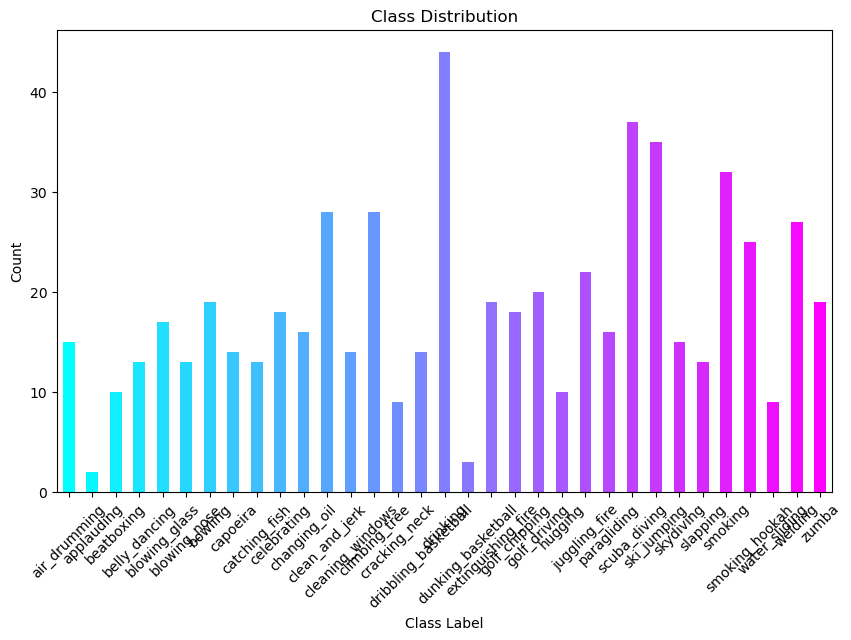

In [71]:
import matplotlib.cm as cm

# Group by class label and count the occurrences
class_distribution = df.groupby('class_label').size()

# Define a colormap to create a gradient of colors
colormap = cm.get_cmap('cool', len(class_distribution))

# Plotting the class distribution with a gradient of colors
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color=colormap(range(len(class_distribution))))
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [5]:
l = list(df.class_index)
unique_values = list(set(l))
len(unique_values)

33

In [73]:
b = list(df.class_label)
unique_values_b = list(set(b))
print(unique_values_b)

['clean_and_jerk', 'welding', 'celebrating', 'bowling', 'smoking_hookah', 'smoking', 'dribbling_basketball', 'ski_jumping', 'belly_dancing', 'paragliding', 'hugging', 'air_drumming', 'capoeira', 'golf_driving', 'applauding', 'golf_chipping', 'slapping', 'extinguishing_fire', 'dunking_basketball', 'beatboxing', 'zumba', 'cracking_neck', 'cleaning_windows', 'changing_oil', 'blowing_glass', 'catching_fish', 'drinking', 'climbing_tree', 'skydiving', 'scuba_diving', 'water_sliding', 'blowing_nose', 'juggling_fire']


## Denoising Filters
- Median Denosing
- NL Means Denoising
- Laplacian Denoising

In [6]:
class VideoMedianDenoise(object):
    def __init__(self, kernel_size=3):
        self.kernel_size = kernel_size
    
    def __call__(self, frames):
        return self.median_denoising(frames)
    
    def median_denoising(self, frames):
        result = []
        for frame in frames:
            frame_denoised = cv2.medianBlur(frame, self.kernel_size)
            result.append(frame_denoised)
        return result

class VideoNLMeansDenoise(object):
    def __init__(self, h=3.0, search_window=11, patch_size=5):
        self.h = h
        self.search_window = search_window
        self.patch_size = patch_size
    
    def __call__(self, frames):
        return self.nlmeans_denoising(frames)
    
    def nlmeans_denoising(self, frames):
        result = []
        for frame in frames:
            frame_denoised = cv2.fastNlMeansDenoisingColored(frame, None, self.h, self.h, self.search_window, self.patch_size)
            result.append(frame_denoised)
        return result

class VideoLaplacianDenoise(object):
    def __init__(self):
        pass
    
    def __call__(self, frames):
        return [self.laplacian_denoising(frame) for frame in frames]
    
    def laplacian_denoising(self, frame):
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_filtered = cv2.Laplacian(frame_gray, cv2.CV_64F)
        frame_denoised = cv2.convertScaleAbs(frame_filtered)
        frame_denoised = cv2.cvtColor(frame_denoised, cv2.COLOR_GRAY2BGR)
        return frame_denoised
    

## Image Enhancement
- MinMax Contrast Stretching
- Contrast Adjustment
- Log Correction
- Histogram Equalization
- CLAHE

In [36]:
class VideoContrastAdjustment(object):
    def __init__(self, gamma=0.3):
        self.gamma = gamma
    
    def __call__(self, frames):
        result = []
        for frame in frames:
            adjusted_frame = self.adjust_contrast(frame)
            result.append(adjusted_frame)
        return result
    
    def adjust_contrast(self, frame):
        frame = frame.astype('float32') / 255.0
        frame = frame ** self.gamma
        frame = np.clip(frame * 255.0, 0, 255).astype('uint8')
        return frame

class VideoLogCorrection(object):
    def __init__(self):
        pass
    
    def __call__(self, frames):
        result = []
        for frame in frames:
            corrected_frame = self.apply_log_correction(frame)
            result.append(corrected_frame)
        return result
    
    def apply_log_correction(self, frame):
        frame = frame.astype('float32') + 1e-6  # Add a small constant to avoid log(0)
        frame = np.log(frame)
        frame = np.clip(frame, 0, 255).astype('uint8')
        return frame

class VideoHistogramEqualization(object):
    def __init__(self):
        pass
    
    def __call__(self, frames):
        result = []
        for frame in frames:
            equalized_frame = self.apply_histogram_equalization(frame)
            result.append(equalized_frame)
        return result
    
    def apply_histogram_equalization(self, frame):
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_equalized = cv2.equalizeHist(frame_gray)
        frame_equalized = cv2.cvtColor(frame_equalized, cv2.COLOR_GRAY2BGR)
        return frame_equalized

class VideoCLAHE(object):
    def __init__(self, clip_limit=2.0, tile_grid_size=(8, 8)):
        self.clip_limit = clip_limit
        self.tile_grid_size = tile_grid_size
    
    def __call__(self, frames):
        result = []
        for frame in frames:
            clahe_frame = self.apply_clahe(frame)
            result.append(clahe_frame)
        return result
    
    def apply_clahe(self, frame):
        frame_lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
        clahe = cv2.createCLAHE(clipLimit=self.clip_limit, tileGridSize=self.tile_grid_size)
        clahe_frame_lab = clahe.apply(frame_lab[:, :, 0])
        frame_lab[:, :, 0] = clahe_frame_lab
        frame_clahe = cv2.cvtColor(frame_lab, cv2.COLOR_LAB2BGR)
        return frame_clahe


class VideoMinMaxContrastStretching(object):
    def __init__(self):
        pass
    
    def __call__(self, frames):
        result = []
        for frame in frames:
            stretched_frame = self.apply_minmax_contrast_stretching(frame)
            result.append(stretched_frame)
        return result
    
    def apply_minmax_contrast_stretching(self, frame):
        frame = frame.astype('float32')
        min_val = np.min(frame)
        max_val = np.max(frame)
        stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))
        stretched_frame = np.clip(stretched_frame, 0, 255).astype('uint8')
        return stretched_frame
    
class VideoGammaCorrection(object):
    def __init__(self, gamma=1.50):
        self.gamma = gamma
    
    def __call__(self, frames):
        result = []
        for frame in frames:
            corrected_frame = self.apply_gamma_correction(frame)
            result.append(corrected_frame)
        return result
    
    def apply_gamma_correction(self, frame):
        gamma_table = np.array([((i / 255.0) ** self.gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')
        corrected_frame = cv2.LUT(frame, gamma_table)
        return corrected_frame


## Common Functions

## get pretrained models

In [8]:
def get_pretrained_models(model_name: str):
    try:
        net = gluoncv.model_zoo.get_model(model_name, pretrained=True)
        classes = net.classes
        print("******************************************************************************")
        print("Model: {} : downloaded and fetch successfully".format(model_name))
        print("******************************************************************************")
        return net , classes
    except Exception as err:
        print("Please pass correct model_name")
        print(str(err))

## Video Transformer

In [37]:
class VideoTransformer(object):
    def __init__(self, transform_fn_list :list = []):
        self.transformer_dict = {
            "median_denoising": VideoMedianDenoise,
            "nl_means_denoising": VideoNLMeansDenoise,
            "laplacian_denoising": VideoLaplacianDenoise,
            "contrast_adjustment": VideoContrastAdjustment,
            "log_correction": VideoLogCorrection,
            "histogram_equalization": VideoHistogramEqualization,
            "CLAHE": VideoCLAHE,
            "minmax_contrast": VideoMinMaxContrastStretching,
            "center_crop": video.VideoCenterCrop,
            "video_to_tensor": video.VideoToTensor,
            "video_normalize": video.VideoNormalize,
            "gamma_correction": VideoGammaCorrection
        }
        self.transformer_fn_list = transform_fn_list
        
    def add_transformer(self, transformer_name:str, **kwargs):
        print(kwargs)
        self.transformer_fn_list.append(self.transformer_dict[transformer_name](**kwargs))
        print("******************************************************************************")
        print("Transform: {} Added".format(transformer_name))
        print("******************************************************************************")
        
    def get_final_transformer(self):
        print("******************************************************************************")
        print("current Transformer list")
        print(self.transformer_fn_list)
        print("******************************************************************************")
        return self.transformer_fn_list
    

## Video frames to clips

In [10]:
def video_frames_to_clip(video_fname, transform_fn, model_name):
    try:
        print("******************************************************************************")
        vr = decord.VideoReader(video_fname)
        if 'slow' in model_name:
            fast_frame_id_list = range(0, 64, 2)
            slow_frame_id_list = range(0, 64, 16)
            frame_id_list = list(fast_frame_id_list) + list(slow_frame_id_list)
            video_data = vr.get_batch(frame_id_list).asnumpy()
            clip_input = [video_data[vid, :, :, :] for vid, _ in enumerate(frame_id_list)]
            clip_input = transform_fn(clip_input)
            clip_input = np.stack(clip_input, axis=0)
            clip_input = clip_input.reshape((-1,) + (36, 3, 224, 224))
            clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))
        elif 'c3d' in model_name:
            frame_id_list = range(0, 32, 2)
            video_data = vr.get_batch(frame_id_list).asnumpy()
            clip_input = [video_data[vid, :, :, :] for vid, _ in enumerate(frame_id_list)]
            clip_input = transform_fn(clip_input)
            clip_input = np.stack(clip_input, axis=0)
            clip_input = clip_input.reshape((-1,) + (16, 3, 112, 112))
            clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))
        else:
            frame_id_list = range(0, 64, 2)
            video_data = vr.get_batch(frame_id_list).asnumpy()
            clip_input = [video_data[vid, :, :, :] for vid, _ in enumerate(frame_id_list)]
            clip_input = transform_fn(clip_input)
            clip_input = np.stack(clip_input, axis=0)
            clip_input = clip_input.reshape((-1,) + (32, 3, 224, 224))
            clip_input = np.transpose(clip_input, (0, 2, 1, 3, 4))
        
        print("{} Video frames converted to clip successfully".format(video_fname))
        print("******************************************************************************")
        return clip_input
    except Exception as err:
        print("******************************************************************************")
        print("video_frames_to_clip failed")
        print(str(err))
        print("******************************************************************************")
        sys.exit("video_frames_to_clip failed") 

## Inference function

In [130]:
import time
def get_predicted_labels(model_name, transformer_dic, df):
    pred_list = []
    top_k = []
    video_transformer_obj = VideoTransformer(transform_fn_list=[])
    net, classes = get_pretrained_models(model_name)
    for fn_name, fn_values in transformer_dic.items():
        video_transformer_obj.add_transformer(fn_name, **fn_values)
    transform_fn = transforms.Compose(video_transformer_obj.get_final_transformer())
    
    for video_fname in df['video_path']:
        try:
            clip_input = video_frames_to_clip(video_fname, transform_fn, model_name)
            start = time.time()
            pred = net(nd.array(clip_input))
            print("Average prediction time {}".format((time.time()-start)))
            topK = 5
            ind = nd.topk(pred, k=topK)[0].astype('int')
            print("******************************************************************************")
            print('The input video clip is classified to be')
            print(classes[ind[0].asscalar()])
            print("******************************************************************************")
            pred_list.append(int(ind[0].asscalar()))
            top_k.append(float(nd.softmax(pred)[0][ind[0]].asscalar()))
        except:
            pred_list.append(None)
            top_k.append(None)
    df_pred = df
    df_pred['pred'] = pred_list
    df_pred['top_k'] = top_k
    df_pred = df_pred.dropna()
    return df_pred

## Evaluation Function

In [12]:
def get_evaluation_metrics(model_name, model_backbone, video_transformer, transformer_dict, df_pred):
    global result_df
    actual_labels = df_pred['class_index']
    predicted_labels = df_pred['pred']
    # Calculate accuracy
    accuracy = accuracy_score(actual_labels, predicted_labels)
    # Calculate Top K
    avg_top_k = sum(df_pred['top_k'])/len(df_pred)
    
    # Calculate precision
    precision = precision_score(actual_labels, predicted_labels, average='macro')
    # Calculate recall
    recall = recall_score(actual_labels, predicted_labels, average='macro')
    # Calculate F1-score
    f1 = f1_score(actual_labels, predicted_labels, average='macro')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Avg Top_K", avg_top_k)
    # Create a new DataFrame
    new_df = pd.DataFrame({
        'model_name': [model_name],
        'model_with_backbone_and_weights': [model_backbone],
        'video_transformation': [video_transformer],
        'transformers': [transformer_dict],
        'accuracy': [accuracy],
        'avg_top_k': [avg_top_k],
        'f1': [f1],
        'recall': [recall],
        'precision': [precision]
    })
    # Append the new DataFrame to the existing DataFrame
    result_df = result_df.append(new_df, ignore_index=True)
    

## Experiments

## Experiment without video transformer with kinetics400 Weights

In [13]:
transformer_dic_denoising = {
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
******************************************************************************
******************************************************************************
current Transformer list
[VideoCenterCrop(

), VideoToTe

massaging_back
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
**************************************************************************

smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
****************************************************************************

dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
**********************

trimming_or_shaving_beard
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trimming_or_shaving_beard
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
chopping_wood
********************************************************************

punching_bag
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/drinking/Drink_1_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
**************************************************************

arm_wrestling
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_19.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
folding_napkins
******************************************************************************
******

waxing_back
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/aJJmEir_Ipk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
***

diving_cliff
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/skydiving/MayGtbZrUZA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
**************

sword_fighting
******************************************************************************
******************************************************************************
dataset/golf_driving/Z08f6msPR8s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************
******************************************************************************
dataset/golf_driving/7bTQ0fcvvKY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
**

tap_dancing
******************************************************************************
******************************************************************************
dataset/zumba/Vrvu0WThAOA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
country_line_dancing
******************************************************************************
******************************************************************************
dataset/zumba/EDaCHr1yRvc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_charleston
******************************************************************************
*******

water_sliding
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/a7Qqp0TIQYQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_bed
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g19_c05.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_piano
************************************************************

celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/NfeGt5aNOnI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/celebrating/qvPGFHQ1sxQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
********

welding
******************************************************************************
******************************************************************************
dataset/welding/b8K1T7NYYDQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/0gk7bMlB2EY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_bed
******************************************************************************
****************************

tobogganing
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_le_goo_12.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waiting_in_line
******************************************************************************
******************************************************************************
dataset/hugging/bxsY1e9NGrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_head
*******************************

barbequing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/vlN4irpkdhs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
using_remote_controller_-not_gaming-
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/HyPfjlCdhoY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
***********************************************************

capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/SyNDPEY4PmQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
krumping
******************************************************************************
******************************************************************************
dataset/capoeira/0rjz79WV_Ko.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
**************************

smoking
******************************************************************************
******************************************************************************
dataset/cracking_neck/A1CyEtThLzM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/cracking_neck/VhO8-Kc_t1A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
***

******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/gpfgdV5Sta0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/SawLdevTbQY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video

weaving_basket
******************************************************************************
******************************************************************************
dataset/scuba_diving/2PORKL_OHAQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/EDOx77BDBZk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
****

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/8pBehjaDzGM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/scuba_diving/wecMjgVY3zA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

water_sliding
******************************************************************************
******************************************************************************
dataset/air_drumming/UHD-eXFtxCE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
gymnastics_tumbling
******************************************************************************
******************************************************************************
dataset/air_drumming/rOxGtBTjINQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************


dataset/changing_oil/AXtojjtvhoc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/changing_oil/MdWYEQn4YCQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cutting_pineapple
******************************************************************************
******************************************************************************
dataset/changing_oil/nZk1V13mvzk.mp4 Video frames converted to clip successfully
*************

golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c06.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
abseiling
******************************************************************************
******************************************************************************
dataset/golf_chipping/TAqydsP18mo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/SUwPjcFlQJA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/mPHiUH416Bs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/VhLOskCdM10.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/uT2ydm_2DMk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sled_dog_racing
************************************************************

grooming_horse
******************************************************************************
******************************************************************************
dataset/blowing_nose/t53jgr9QI8Y.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_head
******************************************************************************
******************************************************************************
dataset/blowing_nose/jpo41uPxpf4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
****

smoking
******************************************************************************
******************************************************************************
dataset/smoking/jo_j_NaIWFg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_elephant
******************************************************************************
******************************************************************************
dataset/smoking/A-iPnnNzA6k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
***************

flying_kite
******************************************************************************
******************************************************************************
dataset/smoking/Raucher_Antiraucher_Werbung_smoke_h_cm_np1_fr_med_1.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking/-KmI1S3A9Rc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
*************************************************************

dataset/bowling/gTRa6hwj76w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/2K8Zo7PVcr4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/y_QSNGtvdrc.mp4 Video frames converted to clip successfully
******************************************

bookbinding
******************************************************************************
******************************************************************************
dataset/blowing_glass/qJjzQ2b-8jE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************
******************************************************************************
dataset/blowing_glass/cNVVGu3nBDE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_water
******************************************************************************
******

bungee_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/G89VpEJ7N0o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/UhL_BX1i1eQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
********

biking_through_snow
******************************************************************************
******************************************************************************
dataset/ski_jumping/60Qd-t1mbFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_paintball
******************************************************************************
******************************************************************************
dataset/ski_jumping/OA8biMcVqX0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************

In [14]:
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","No Video Tranformer used", transformer_dic_denoising, df_filtered)
result_df

Accuracy: 0.678391959798995
Precision: 0.5663594651875903
Recall: 0.5822414998196248
F1-score: 0.5396831033549784
Avg Top_K 0.566220052072301


/tmp/ipykernel_31741/2756333105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name model_with_backbone_and_weights      video_transformation  \
0        C3D                 c3d_kinetics400  No Video Tranformer used   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392    0.56622   

         f1    recall  precision  
0  0.539683  0.582241   0.566359

In [15]:
transformer_dic_denoising = {
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
******************************************************************************
******************************************************************************
current Transformer list
[VideoCenterCr

dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/cleaning_windows/alnSuLlHrjk.mp4 Video frames converted to clip successfully
****

******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cl

******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/IvWPuO5vtn4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_67.avi Video frames converted to clip successfully
******************************************************************************
****************************************************************************

******************************************************************************
The input video clip is classified to be
tasting_beer
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_le_goo_46.avi Video frames converted to clip successfully
******************************************************************************
**************************************************

dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
milking_cow
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/Hqqv4KerL6k.mp4 Video frames converted to clip successfully
**************

surfing_crowd
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/AVgtAA-1SM0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
*

******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/skydiving/JzxDv226EW4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is cl

golf_driving
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP_4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/VO8jWoPS6G8.mp4 V

******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************************************************************
dataset/zumba/7_gEtxgwm80.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified t

******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
news_anchoring
******************************************************************************
******************************************************************************
dataset/celebrating/_HKhaJVitzs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input v

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/8DURjoV3tRs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/4T1grjf9TCY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to b

dataset/welding/o7xLTc__Cr8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/9enOGiIQ-eQ.mp4 Video frames converted to clip successfully
******************************************************************************
***********************************************************************

******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G9A2C1U1cKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
recording_music
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g01_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************

deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/-wOtruVo7sY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/_ai0rs08uHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
****************************************************************************

******************************************************************************
The input video clip is classified to be
tai_chi
******************************************************************************
******************************************************************************
dataset/capoeira/-xccz8S0qTE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/Eym38xwD_4M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified t

dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
finger_snapping
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
*************************

diving_cliff
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
***

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/ztmZjv-QXcQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

singing
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/cjSPyzOaxIg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
***********

dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
brush_painting
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_legs
******************************************************************************
******************************************************************************
dataset/changing_oil/ngw5N2qYQis.mp4 Video frames converted to clip successfully
***************

******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/Casie_Cathrea_golf_f_nm_np1_fr_med_0.avi Video frames converted to clip successfully
******************************************************************************
**********************************************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/FlIfJHY8qBE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
exercising_arm
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/CEosN7PLAfo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
***********************************************************

dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_nose
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sticking_tongue_out
******************************************************************************
******************************************************************************
dataset/smoking/AkGYuxaQdvo.mp4 Video frames converted to clip successfully
***************

******************************************************************************
The input video clip is classified to be
salsa_dancing
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi Video frames converted to clip successfully
******************************************************************************
***************************************************

******************************************************************************
The input video clip is classified to be
bending_metal
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cooking_egg
******************************************************************************
******************************************************************************
dataset/bowling/pPrdvU-Qhzk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is class

dataset/blowing_glass/RM1UVKUxnEU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/gs4M2vBtUns.mp4 Video frames converted to clip successfully
************

dataset/ski_jumping/EeJR7FtpOrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowkiting
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/7So39YSJxVY.mp4 Video frames converted to clip successfully
***********************

ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/0aFH5gAL0zc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_crosscountry
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
**

******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/FDq9jLeJdgg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is 

In [16]:
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","No Video Tranformer used", transformer_dic_denoising, df_filtered)
result_df

Accuracy: 0.8771428571428571
Precision: 0.8855429685446132
Recall: 0.8806586923085085
F1-score: 0.8741007660212645
Avg Top_K 0.832547979333571


/tmp/ipykernel_31741/3892227205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name   model_with_backbone_and_weights      video_transformation  \
0        C3D                   c3d_kinetics400  No Video Tranformer used   
1        I3D  i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543

In [17]:
transformer_dic_denoising = {
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
******************************************************************************
******************************************************************************
current Transformer list
[VideoCenter

dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/cleaning_windows/alnSuLlHrjk.mp4 Video frames converted to clip successfully


******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/IvWPuO5vtn4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

******************************************************************************
The input video clip is classified to be
tai_chi
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_67.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
Th

******************************************************************************
The input video clip is classified to be
tasting_food
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dining
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_le_goo_46.avi Video frames converted to clip successfully
******************************************************************************
***************************************************

dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
grooming_dog
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/Hqqv4KerL6k.mp4 Video frames converted to clip successfully
*************

taking_a_shower
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/AVgtAA-1SM0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************

******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jetskiing
******************************************************************************
******************************************************************************
dataset/skydiving/JzxDv226EW4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is class

golf_chipping
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 32 48]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP_4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/VO8jWoPS6G

******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************************************************************
dataset/zumba/7_gEtxgwm80.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified t

******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
javelin_throw
******************************************************************************
******************************************************************************
dataset/celebrating/_HKhaJVitzs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input vi

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/8DURjoV3tRs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/4T1grjf9TCY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to b

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/9enOGiIQ-eQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
*************************

clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G9A2C1U1cKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbutting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g01_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
*******************************************************************

deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/-wOtruVo7sY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/_ai0rs08uHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
writing
******************************************************************************
*********

******************************************************************************
The input video clip is classified to be
answering_questions
******************************************************************************
******************************************************************************
dataset/capoeira/-xccz8S0qTE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/Eym38xwD_4M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is 

dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_legs
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
*******************************

snorkeling
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
*****

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/ztmZjv-QXcQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

walking_the_dog
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/air_drumming/cjSPyzOaxIg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
****

dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
plastering
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
petting_cat
******************************************************************************
******************************************************************************
dataset/changing_oil/ngw5N2qYQis.mp4 Video frames converted to clip successfully
********************

******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/Casie_Cathrea_golf_f_nm_np1_fr_med_0.avi Video frames converted to clip successfully
******************************************************************************
*********************************************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/FlIfJHY8qBE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

carving_pumpkin
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/CEosN7PLAfo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
**************************************************************

dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sniffing
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_legs
******************************************************************************
******************************************************************************
dataset/smoking/AkGYuxaQdvo.mp4 Video frames converted to clip successfully
***************************

opening_bottle
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************

making_tea
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
building_cabinet
******************************************************************************
******************************************************************************
dataset/bowling/pPrdvU-Qhzk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
*******************

blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/gs4M2vBtUns.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hopscotch
******************************************************************************
*****

tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/7So39YSJxVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
***********

******************************************************************************
The input video clip is classified to be
skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trapezing
******************************************************************************
******************************************************************************
dataset/ski_jumping/Rk9_lnHjYIM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
T

surfing_crowd
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/FDq9jLeJdgg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
****************

In [18]:
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","No Video Tranformer used", transformer_dic_denoising, df_filtered)

result_df

Accuracy: 0.8557377049180328
Precision: 0.8355348031398677
Recall: 0.8075057686283016
F1-score: 0.8049307283231844
Avg Top_K 0.825600193782908


/tmp/ipykernel_31741/1012207406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535

## Experiment with median denoising with kinetics400 Weights

In [19]:
transformer_dic_denoising = {
    "median_denoising": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: median_denoising Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*******************

dataset/cleaning_windows/uafazjx8pX8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
massaging_back
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
*

smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
**************************************************************************

bungee_jumping
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
********

trimming_or_shaving_beard
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arm_wrestling
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
**************************************************************************

punching_bag
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_1_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
*******************************************************************

arm_wrestling
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_19.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tying_tie
******************************************************************************
************

waxing_legs
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/aJJmEir_Ipk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
***

flying_kite
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/skydiving/MayGtbZrUZA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
***************

flying_kite
******************************************************************************
******************************************************************************
dataset/golf_driving/Z08f6msPR8s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************
******************************************************************************
dataset/golf_driving/7bTQ0fcvvKY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
*****

salsa_dancing
******************************************************************************
******************************************************************************
dataset/zumba/Vrvu0WThAOA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
country_line_dancing
******************************************************************************
******************************************************************************
dataset/zumba/EDaCHr1yRvc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************

crawling_baby
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/a7Qqp0TIQYQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_bed
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g19_c05.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_piano
************************************************************

air_drumming
******************************************************************************
******************************************************************************
dataset/celebrating/qvPGFHQ1sxQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/celebrating/FzdJiypbN5Q.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_dishes
******************************************************************************
*****

welding
******************************************************************************
******************************************************************************
dataset/welding/0gk7bMlB2EY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_bed
******************************************************************************
******************************************************************************
dataset/welding/H4xqTNXs-cI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sailing
******************************************************************************
****************************

waiting_in_line
******************************************************************************
******************************************************************************
dataset/hugging/bxsY1e9NGrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_le_goo_11.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_snowman
*********************************

using_remote_controller_-not_gaming-
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/HyPfjlCdhoY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/cHKIpkW1lDI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_cart
*********************************************************

krumping
******************************************************************************
******************************************************************************
dataset/capoeira/0rjz79WV_Ko.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/ExsKDCVBOts.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_shots
******************************************************************************
********************

waxing_chest
******************************************************************************
******************************************************************************
dataset/cracking_neck/VhO8-Kc_t1A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/cracking_neck/CYl2AasfaVo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
****

catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/SawLdevTbQY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/jxIsVYgWaEQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jumping_into_pool
*****************************************************************************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/vdNL2Dj2-uY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/scuba_diving/PgO0aMy3N1E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
********

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/b62DICn8RLg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/OkmNN8JZZ7o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
********

feeding_fish
******************************************************************************
******************************************************************************
dataset/air_drumming/IGHdEO1cnhI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
roller_skating
******************************************************************************
******************************************************************************
dataset/air_drumming/gHoFt2ugKyQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
slapping
******************************************************************************
********

******************************************************************************
The input video clip is classified to be
hockey_stop
******************************************************************************
******************************************************************************
dataset/changing_oil/MaxL809orZo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/lpiT7_w5NdA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip

golf_putting
******************************************************************************
******************************************************************************
dataset/golf_chipping/iQ42i_YgGh8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
planting_trees
******************************************************************************
******************************************************************************
dataset/golf_chipping/ekLOwiqkyvM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
*

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/7lSOrSIyzwg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/MnzqdzzeGEQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

sled_dog_racing
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/RsMyK2FL3pI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_skating
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/CRZ4yaogS_o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
*****************************************************************

waxing_chest
******************************************************************************
******************************************************************************
dataset/blowing_nose/btrDEXbW3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_dishes
******************************************************************************
******************************************************************************
dataset/blowing_nose/l0lnLDjQkFY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_nose
******************************************************************************
****

dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking/girl_smoking_a_cigarette_smoke_h_nm_np1_fr_med_1.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking/VT8bbWpNbGk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_or_throwing_baseball
********************************************

crying
******************************************************************************
******************************************************************************
dataset/smoking/EsANK8DdK8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_hands
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_4.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
baby_waking_up
*********************************************************************

bobsledding
******************************************************************************
******************************************************************************
dataset/bowling/2y5oRF_eaYU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pumping_fist
******************************************************************************
******************************************************************************
dataset/bowling/Kt_wBJCRDDE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
**********************

tossing_salad
******************************************************************************
******************************************************************************
dataset/blowing_glass/JjHUXZcopBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/blowing_glass/qvAqUQNQZEU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
**

ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/SFp5lWtOF-w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_skiing
******************************************************************************
******************************************************************************
dataset/ski_jumping/okr6vwdX1k4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
*************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/ski_jumping/3XgZeVWwkA8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/beatboxing/X_Z9v6vq35c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
*******

In [20]:
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","Median Denoising", transformer_dic_denoising, df_filtered)
result_df

Accuracy: 0.6634146341463415
Precision: 0.5626364087301587
Recall: 0.5719584235209235
F1-score: 0.543764510952011
Avg Top_K 0.544349718202905


/tmp/ipykernel_31741/4212633965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636

In [21]:
transformer_dic_denoising = {
    "median_denoising": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: median_denoising Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
**

feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
***************************************************************************

******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cl

******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/IvWPuO5vtn4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

******************************************************************************
The input video clip is classified to be
sword_fighting
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_67.avi Video frames converted to clip successfully
******************************************************************************
**************************************************************************

******************************************************************************
The input video clip is classified to be
tasting_food
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_le_goo_46.avi Video frames converted to clip successfully
******************************************************************************
***************************************************

dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
milking_cow
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/Hqqv4KerL6k.mp4 Video frames converted to clip successfully
**************

surfing_crowd
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/AVgtAA-1SM0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
*

******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
canoeing_or_kayaking
******************************************************************************
******************************************************************************
dataset/skydiving/JzxDv226EW4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cl

golf_driving
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP_4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/VO8jWoPS6G8.mp4 V

******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************************************************************
dataset/zumba/7_gEtxgwm80.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified t

dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
recording_music
******************************************************************************
******************************************************************************
dataset/celebrating/_HKhaJVitzs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cheerleading
****************************************************************************

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/8DURjoV3tRs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/4T1grjf9TCY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to b

******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/9enOGiIQ-eQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
*******************

******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G9A2C1U1cKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arm_wrestling
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g01_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
T

deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/-wOtruVo7sY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/_ai0rs08uHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
****************************************************************************

******************************************************************************
The input video clip is classified to be
juggling_balls
******************************************************************************
******************************************************************************
dataset/capoeira/-xccz8S0qTE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/Eym38xwD_4M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is class

dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
finger_snapping
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spinning_poi
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
**************************

diving_cliff
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
***

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/ztmZjv-QXcQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

singing
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/cjSPyzOaxIg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
***********

dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
brush_painting
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_legs
******************************************************************************
******************************************************************************
dataset/changing_oil/ngw5N2qYQis.mp4 Video frames converted to clip successfully
***************

******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/Casie_Cathrea_golf_f_nm_np1_fr_med_0.avi Video frames converted to clip successfully
******************************************************************************
**********************************************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/FlIfJHY8qBE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
exercising_arm
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/CEosN7PLAfo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
***********************************************************

dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_nose
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sticking_tongue_out
******************************************************************************
******************************************************************************
dataset/smoking/AkGYuxaQdvo.mp4 Video frames converted to clip successfully
***************

******************************************************************************
The input video clip is classified to be
salsa_dancing
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi Video frames converted to clip successfully
******************************************************************************
***************************************************

bowling
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cooking_egg
******************************************************************************
******************************************************************************
dataset/bowling/pPrdvU-Qhzk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
using_computer
******************************************************************************
********************

blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/gs4M2vBtUns.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_leaves
******************************************************************************


snowkiting
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/7So39YSJxVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
************

******************************************************************************
The input video clip is classified to be
skiing_crosscountry
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/ski_jumping/Rk9_lnHjYIM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input vide

surfing_crowd
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/FDq9jLeJdgg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
*************

In [22]:
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","Median Denoising", transformer_dic_denoising, df_filtered)
result_df

Accuracy: 0.8950437317784257
Precision: 0.9154618531139913
Recall: 0.917023209955679
F1-score: 0.9099285628682845
Avg Top_K 0.8476667732174126


/tmp/ipykernel_31741/645144913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   
4        I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4  {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636  
4  0.909929  0.917023   0.915462

In [23]:
transformer_dic_denoising = {
    "median_denoising": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: median_denoising Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added


feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
***********************************************************************

making_a_cake
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
*********

dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
**********************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tai_chi
******************************************************************************
************************

******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/drinking/Drink_16_2.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
**************************************************************

******************************************************************************
The input video clip is classified to be
singing
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
*******************

dataset/climbing_tree/8OOTdaexj3o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/8Sszxu2zRws.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
************

flying_kite
******************************************************************************
******************************************************************************
dataset/skydiving/njRWP1epo3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
*****************

dataset/golf_driving/n9AelAAeoOE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
***************

zumba
******************************************************************************
******************************************************************************
dataset/zumba/rOUUpRe4mpU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
*****************************************

shooting_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/9fnA-sb9F6E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
throwing_ball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
*****************************************************

dataset/celebrating/YygOcIQd1nA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/celebrating/Sc1Qt5-kQYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
************************

******************************************************************************
The input video clip is classified to be
giving_or_receiving_award
******************************************************************************
******************************************************************************
dataset/welding/pPYxA32MrGk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_ba_goo_2.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
kissing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
*********************************

******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/I-GG10E4xBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bending_back
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The i

salsa_dancing
******************************************************************************
******************************************************************************
dataset/capoeira/vJO0jgOpkno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
*********************

beatboxing
******************************************************************************
******************************************************************************
dataset/slapping/NTwHN-XnQhA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_person_-boxing-
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
**********************************************

dataset/catching_fish/BV0cSwoKXl0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
*************

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/bSuvChPpwQ0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/scuba_diving/xqHQA01QFDg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

playing_cymbals
******************************************************************************
******************************************************************************
dataset/air_drumming/tIXejmTfwRc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
***

dataset/changing_oil/kFCoZem7XLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
opening_bottle
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
***************

******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The inpu

******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 1064448 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/juggling_fire/Zs1loXTFR3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Mwreo2lMhcI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
*******************************************************

dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_elephant
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
********************

smoking
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_poker
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
************************************

smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
************************

******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/RL0Jhd1IEqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

dataset/applauding/brBw6cFwock.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
marching
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 48]
******************************************************************************
******************************************************************************
dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video frames converted to clip successfully
******************************************************************************
***********************************************************

ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/XbNGnOH6-f8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/3MIcMpRsjzc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
***********

dataset/beatboxing/QafYheILhrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/beatboxing/InCjGNP6xno.mp4 Video frames converted to clip successfully
**************************

In [24]:
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","Median Denoising", transformer_dic_denoising, df_filtered)
result_df

Accuracy: 0.8631921824104235
Precision: 0.8691464106545629
Recall: 0.850792696886447
F1-score: 0.8369718827827665
Avg Top_K 0.8282736400293993


/tmp/ipykernel_31741/726005761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   
4        I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5   SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4  {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5  {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636  
4  0.909929  0.917023   0.915462  
5  0.836972  0.850793   0.869146

## Experiment with Gamma Correction with kinetics400 Weights

In [38]:
transformer_dic_denoising = {
    "gamma_correction": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","Gamma Correction", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: gamma_correction Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*******************

playing_piano
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_paintball
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bouncing_on_trampoline
*************************************************************

diving_cliff
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
****************************************************************************

******************************************************************************
The input video clip is classified to be
chopping_wood
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hockey_stop
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/BIG_FISH_drink_h_nm_np1_fr_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
***

playing_recorder
******************************************************************************
******************************************************************************
dataset/drinking/Drink_4_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spinning_poi
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
milking_cow
**************************************************************

smoking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_15.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arm_wrestling
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
*************

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/ahw8dLQcmxw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_back
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
***

bungee_jumping
******************************************************************************
******************************************************************************
dataset/skydiving/br8tGRi6U4g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
*********

tossing_coin
******************************************************************************
******************************************************************************
dataset/golf_driving/QBHhHqfu4bw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sword_fighting
******************************************************************************
******************************************************************************
dataset/golf_driving/Z08f6msPR8s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
****

dancing_macarena
******************************************************************************
******************************************************************************
dataset/zumba/XR5r1NvV-uo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_unicycle
******************************************************************************
******************************************************************************
dataset/zumba/Vrvu0WThAOA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
country_line_dancing
******************************************************************************
*****

high_kick
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/CMbYEkTkDHU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crawling_baby
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/a7Qqp0TIQYQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_bed
*************************************************************************

celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/kIqwsdqFZAg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/NfeGt5aNOnI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
**********

blowing_glass
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/b8K1T7NYYDQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
*************************

dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tossing_coin
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_le_goo_12.avi Video frames co

clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
********************************************************************

contact_juggling
******************************************************************************
******************************************************************************
dataset/capoeira/XkNwD3163h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_camel
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
********

eating_chips
******************************************************************************
******************************************************************************
dataset/cracking_neck/SjPKRVD10IA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tapping_guitar
******************************************************************************
****

surfing_crowd
******************************************************************************
******************************************************************************
dataset/catching_fish/iTLQpPM0Zhw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
canoeing_or_kayaking
******************************************************************************
******************************************************************************
dataset/catching_fish/Yj6DX_xI_oQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
*************************************************************************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4HO8lvDC7zE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/QibTyEML7po.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trapezing
******************************************************************************
*********

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/338K7A52ux4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/uyTO9zKaJWs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

jumping_into_pool
******************************************************************************
******************************************************************************
dataset/water_sliding/3ELeJOLh5z8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
******************************************************************************
dataset/water_sliding/z3O9BA6Ta_k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jetskiing
******************************************************************************
*

******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/changing_oil/9acZ5doqzXA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_head
******************************************************************************
******************************************************************************
dataset/changing_oil/AXtojjtvhoc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cl

mowing_lawn
******************************************************************************
******************************************************************************
dataset/golf_chipping/Jim_Furyk_Impression_golf_f_cm_np1_ri_med_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c06.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
*******************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/Z1bIfOxGYVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spinning_poi
******************************************************************************
******************************************************************************
dataset/juggling_fire/0VtMS5pH230.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
***

dataset/extinguishing_fire/QyzmiAgvL_A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/_WDUalejGHo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/QgrGUYeFKto.mp4 Video frames converted to clip successfully
***

dataset/extinguishing_fire/tA2bjmmeHmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/blowing_nose/AnyEHBnVnOo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/blowing_nose/qqJhButEJUI.mp4 Video frames converted to clip successfully
*************

eating_chips
******************************************************************************
******************************************************************************
dataset/smoking/Glory_smoke_u_nm_np1_le_goo_34.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/smoking/After_work_smoke_in_the_garage_smoke_h_nm_np1_fr_med_1.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_recorder
*******************************

playing_recorder
******************************************************************************
******************************************************************************
dataset/smoking/fJL77I_whDc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/smoking/4eaqArKn8h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
***********

bowling
******************************************************************************
******************************************************************************
dataset/bowling/d0PiN_5fvZc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/gTRa6hwj76w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
*******************************

feeding_fish
******************************************************************************
******************************************************************************
dataset/blowing_glass/ihxXKfwdFg4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bookbinding
******************************************************************************
******************************************************************************
dataset/blowing_glass/qJjzQ2b-8jE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************
*******

dataset/ski_jumping/hHurxCFf9Yc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/ski_jumping/HjSIiq_QWZk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
******************************************************************************
dataset/ski_jumping/G89VpEJ7N0o.mp4 Video frames converted to clip successfully
*************************

marching
******************************************************************************
******************************************************************************
dataset/ski_jumping/erN5W5RGjSg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************
******************************************************************************
dataset/ski_jumping/omK-z1FcgnE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shooting_goal_-soccer-
******************************************************************************
****

/tmp/ipykernel_31741/1051572905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   
4        I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5   SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6        C3D                     c3d_kinetics400          Gamma Correction   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4  {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5  {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6  {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636  
4  0.909929  0.917023   0.915462  
5  0.836972  0.850793   0.869146  
6  0.557471  0.581051   0.583583

In [39]:
transformer_dic_denoising = {
    "gamma_correction": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","Gamma Correction", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: gamma_correction Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
**

feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tossing_coin
************************************************************************

******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cl

flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
***********

drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_trumpet
******************************************************************************
*****************

******************************************************************************
The input video clip is classified to be
contact_juggling
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_beer
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
*****************************

dataset/drinking/Drink_3_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
********************************************************************

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/8Sszxu2zRws.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
*

dataset/skydiving/njRWP1epo3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
********************************

mowing_lawn
******************************************************************************
******************************************************************************
dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
slacklining
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
********

******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba


******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************

dataset/celebrating/Sc1Qt5-kQYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
************************

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape (32,3,224,224)
******************************************************************************
**************************

******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/2AYxL9o3id0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
T

stretching_arm
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
*******************************************************************

******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/capoeira/33IjN-RyuVc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classi

dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
finger_snapping
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spinning_poi
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
**************************

bungee_jumping
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
*

dataset/scuba_diving/gr7IXcrU2F4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
*****************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/FZFGYZ1MVWk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

texting
******************************************************************************
******************************************************************************
dataset/air_drumming/ebYDs8g3n2Q.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
singing
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
****************

dataset/changing_oil/kpvtKo3B8y0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
lunge
******************************************************************************
******************************************************************************
dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
brush_painting
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
**********************

dataset/golf_chipping/kixXlRNrIqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
*****

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/eqegNXj85Bc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/SCiuS8pD6NM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
***********************************************************

dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_food
******************************************************************************
******************************************************************************
dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_nose
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
*****************

******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking/6pIAEZI4HmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drop_kicking
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
**************************************************************************

******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/eS75AMYK1a8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
testifying
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified t

dataset/blowing_glass/RL0Jhd1IEqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/RM1UVKUxnEU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
************

dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
biking_through_snow
******************************************************************************
******************************************************************************
dataset/ski_jumping/EeJR7FtpOrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_skating
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
**************

******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/1QuLrJfDwCI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/0aFH5gAL0zc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

eating_chips
******************************************************************************
******************************************************************************
dataset/beatboxing/InCjGNP6xno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/ZSjBVS_bdO4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
***********

/tmp/ipykernel_31741/2465629868.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   
4        I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5   SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6        C3D                     c3d_kinetics400          Gamma Correction   
7        I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4  {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5  {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6  {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7  {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636  
4  0.909929  0.917023   0.915462  
5  0.836972  0.850793   0.869146  
6  0.557471  0.581051   0.583583  
7  0.880562  0.899484   0.890625

In [40]:
transformer_dic_denoising = {
    "gamma_correction": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","Gamma Correction", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: gamma_correction Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added


climbing_tree
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
***********************************************************************

******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
kitesurfing
******************************************************************************
***********

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arm_wrestling
***********

smoking_hookah
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
petting_cat
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video frame

******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
*******************

dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_c

pumping_fist
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
**********************************

dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
*********************************************

dataset/celebrating/Sc1Qt5-kQYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_bagpipes
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
*********************

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cooking_on_campfire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
**************

dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_ba_goo_2.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waiting_in_line
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/2

dataset/clean_and_jerk/I-GG10E4xBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
recording_music
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successf

headbanging
******************************************************************************
******************************************************************************
dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
writing
******************************************************************************
************************

punching_person_-boxing-
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 32 48]
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 

dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/catching_fish/AIuWwyX_2fc.mp4 Video frames converted to clip successfully
**************

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/abblVj1ddog.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/CZZQOpGn1Yw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/KPRvgWrmuT8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
texting
******************************************************************************
***********

dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/kpvtKo3B8y0.mp4 Video frames converted to clip successfully
**********************

******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/kixXlRNrIqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video 

******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 1064448 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/juggling_fire/Zs1loXTFR3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Mwreo2lMhcI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
*******************************************************

dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_elephant
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
*************

getting_a_tattoo
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_poker
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_beer
*****************************

smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
************************

bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/RL0Jhd1IEqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
**

shaking_hands
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 48]
******************************************************************************
******************************************************************************
dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
walking_the_dog
******************************************************************************
******************************************************************************
dataset/ski_jumping/EeJR7FtpOrc.mp4 Vi

ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/3MIcMpRsjzc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/1QuLrJfDwCI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
***********

dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/InCjGNP6xno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/ZSjBVS_bdO4.mp4 Video frames converted to clip successfully
***************************

/tmp/ipykernel_31741/1535357542.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   
4        I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5   SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6        C3D                     c3d_kinetics400          Gamma Correction   
7        I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8   SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4  {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5  {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6  {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7  {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8  {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636  
4  0.909929  0.917023   0.915462  
5  0.836972  0.850793   0.869146  
6  0.557471  0.581051   0.583583  
7  0.880562  0.899484   0.890625  
8  0.781393  0.806774   0.805107

## Experiment with Histogram Equalization with kinetics400 Weights

In [41]:
transformer_dic_denoising = {
    "histogram_equalization": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","Histogram Equalization", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: histogram_equalization Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*************

bungee_jumping
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_climbing
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jetskiing
******************************************************************************

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drawing
******************************************************************************


******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip

bee_keeping
******************************************************************************
******************************************************************************
dataset/drinking/BIG_FISH_drink_h_nm_np1_fr_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_birds
*************************************************************************

eating_ice_cream
******************************************************************************
******************************************************************************
dataset/drinking/Drink_4_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bee_keeping
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
********************************************************

sailing
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_15.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shoveling_snow
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parkour
******************************************************************************
**********************

ice_climbing
******************************************************************************
******************************************************************************
dataset/climbing_tree/ahw8dLQcmxw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
rock_climbing
******************************************************************************
*******

blasting_sand
******************************************************************************
******************************************************************************
dataset/skydiving/br8tGRi6U4g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
laying_bricks
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
**********

ice_fishing
******************************************************************************
******************************************************************************
dataset/golf_driving/QBHhHqfu4bw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/golf_driving/Z08f6msPR8s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skateboarding
******************************************************************************
*****

swing_dancing
******************************************************************************
******************************************************************************
dataset/zumba/XR5r1NvV-uo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
dataset/zumba/Vrvu0WThAOA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_charleston
******************************************************************************
**************

kissing
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/CMbYEkTkDHU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
walking_the_dog
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/a7Qqp0TIQYQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_skating
************************************************************************

dataset/celebrating/kIqwsdqFZAg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/celebrating/NfeGt5aNOnI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/celebrating/qvPGFHQ1sxQ.mp4 Video frames converted to clip successfully
*******************

blasting_sand
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_birds
******************************************************************************
******************************************************************************
dataset/welding/b8K1T7NYYDQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
*************

dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shoveling_snow
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_le_goo_12.avi Video frame

recording_music
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
recording_music
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
*****************************************************************

shoveling_snow
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
swing_dancing
******************************************************************************
******************************************************************************
dataset/capoeira/4k3iDiSIPMo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
breakdancing
******************************************************************************
***********

shaving_head
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tapping_guitar
******************************************************************************
******************************************************************************
dataset/cracking_neck/M6y00QezNvA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
******

jetskiing
******************************************************************************
******************************************************************************
dataset/catching_fish/Yj6DX_xI_oQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_ice_hockey
******************************************************************************
******************************************************************************
dataset/catching_fish/H6o9wADsZds.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************


ice_fishing
******************************************************************************
******************************************************************************
dataset/scuba_diving/QibTyEML7po.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/scuba_diving/2PORKL_OHAQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_fishing
******************************************************************************
*******

snowboarding
******************************************************************************
******************************************************************************
dataset/scuba_diving/uyTO9zKaJWs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowmobiling
******************************************************************************
******************************************************************************
dataset/scuba_diving/8pBehjaDzGM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shredding_paper
******************************************************************************
***

water_skiing
******************************************************************************
******************************************************************************
dataset/water_sliding/z3O9BA6Ta_k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
biking_through_snow
******************************************************************************
******************************************************************************
dataset/air_drumming/UHD-eXFtxCE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drop_kicking
*****************************************************************************

dataset/changing_oil/9acZ5doqzXA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_floor
******************************************************************************
******************************************************************************
dataset/changing_oil/AXtojjtvhoc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
walking_the_dog
******************************************************************************
******************************************************************************
dataset/changing_oil/MdWYEQn4YCQ.mp4 Video frames converted to clip successfully
************

making_snowman
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c06.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_accordion
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c06.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_climbing
************************************************************

ski_jumping
******************************************************************************
******************************************************************************
dataset/juggling_fire/0VtMS5pH230.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dunking_basketball
******************************************************************************
******************************************************************************
dataset/juggling_fire/SUwPjcFlQJA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************


digging
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/QgrGUYeFKto.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_snowman
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/VhLOskCdM10.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
reading_newspaper
***********************************************************************

blasting_sand
******************************************************************************
******************************************************************************
dataset/blowing_nose/qqJhButEJUI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
petting_cat
******************************************************************************
******************************************************************************
dataset/blowing_nose/t53jgr9QI8Y.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shoveling_snow
******************************************************************************
****

smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking/jo_j_NaIWFg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/smoking/A-iPnnNzA6k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
****************

drawing
******************************************************************************
******************************************************************************
dataset/smoking/Raucher_Antiraucher_Werbung_smoke_h_cm_np1_fr_med_1.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking/-KmI1S3A9Rc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_toilet
************************************************************

dataset/bowling/gTRa6hwj76w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_skiing
******************************************************************************
******************************************************************************
dataset/bowling/2K8Zo7PVcr4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/y_QSNGtvdrc.mp4 Video frames converted to clip successfully
*************************************

blasting_sand
******************************************************************************
******************************************************************************
dataset/blowing_glass/qJjzQ2b-8jE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/blowing_glass/cNVVGu3nBDE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_skiing
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/ski_jumping/G89VpEJ7N0o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crossing_river
******************************************************************************
******************************************************************************
dataset/ski_jumping/UhL_BX1i1eQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
***********************************************************************

dataset/ski_jumping/omK-z1FcgnE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/ski_jumping/60Qd-t1mbFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
******************************************************************************
dataset/ski_jumping/OA8biMcVqX0.mp4 Video frames converted to clip successfully
************************

/tmp/ipykernel_31741/1708652856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

model_name     model_with_backbone_and_weights      video_transformation  \
0        C3D                     c3d_kinetics400  No Video Tranformer used   
1        I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2   SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3        C3D                     c3d_kinetics400          Median Denoising   
4        I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5   SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6        C3D                     c3d_kinetics400          Gamma Correction   
7        I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8   SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9        C3D                     c3d_kinetics400    Histogram Equalization   

                                        transformers  accuracy  avg_top_k  \
0  {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1  {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2  {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3  {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4  {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5  {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6  {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7  {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8  {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9  {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   

         f1    recall  precision  
0  0.539683  0.582241   0.566359  
1  0.874101  0.880659   0.885543  
2  0.804931  0.807506   0.835535  
3  0.543765  0.571958   0.562636  
4  0.909929  0.917023   0.915462  
5  0.836972  0.850793   0.869146  
6  0.557471  0.581051   0.583583  
7  0.880562  0.899484   0.890625  
8  0.781393  0.806774   0.805107  
9  0.200647  0.234319   0.242342

In [42]:
transformer_dic_denoising = {
    "histogram_equalization": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","Histogram Equalization", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: histogram_equalization Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Ad

bee_keeping
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hula_hooping
****************************************************************************

******************************************************************************
The input video clip is classified to be
shaking_head
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip

jetskiing
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hammer_throw
******************************************************************************
************

******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
swing_dancing
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is cla

******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
*****************************************

******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drawing
******************************************************************************
************

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
yoga
******************************************************************************
************

******************************************************************************
The input video clip is classified to be
hoverboarding
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is c

dancing_ballet
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jogging
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP_4.mp4 Vide

******************************************************************************
The input video clip is classified to be
swing_dancing
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to b

dodgeball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hammer_throw
*************************************************************************

******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bending_back
******************************************************************************
******************************************************************************
dataset/welding/8DURjoV3tRs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classi

******************************************************************************
The input video clip is classified to be
chopping_wood
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/o7xLTc__Cr8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
*************

******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/2AYxL9o3id0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G9A2C1U1cKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input v

clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
chopping_wood
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/-wOtruVo7sY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************


dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/capoeira/33IjN-RyuVc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_cards
******************************************************************************
******************************************************************************
dataset/capoeira/-xccz8S0qTE.mp4 Video frames converted to clip successfully
***************************

dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbutting
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
*********************************

headbanging
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_skiing
******************************************************************************
*****

******************************************************************************
The input video clip is classified to be
mowing_lawn
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_birds
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

yoga
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bee_keeping
******************************************************************************
******************************************************************************
dataset/scuba_diving/ztmZjv-QXcQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
*************

headbanging
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/air_drumming/cjSPyzOaxIg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_charleston
******************************************************************************

dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jogging
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_dishes
******************************************************************************
******************************************************************************
dataset/changing_oil/ngw5N2qYQis.mp4 Video frames converted to clip successfully
********************

******************************************************************************
The input video clip is classified to be
hammer_throw
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bee_keeping
******************************************************************************
******************************************************************************
dataset/golf_chipping/Casie_Cathrea_golf_f_nm_np1_fr_med_0.avi Video frames converted to clip successfully
******************************************************************************
************************************************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_leg
******************************************************************************
******************************************************************************
dataset/juggling_fire/FlIfJHY8qBE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bouncing_on_trampoline
**********************************************************************

ski_jumping
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
front_raises
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/CEosN7PLAfo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
********************************************************************

dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cutting_nails
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking/AkGYuxaQdvo.mp4 Video frames converted to clip successfully
************************

stretching_arm
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
*************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ironing
******************************************************************************
******************************************************************************
dataset/bowling/pPrdvU-Qhzk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_poker
******************************************************************************
******************

blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/blowing_glass/gs4M2vBtUns.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_tennis
******************************************************************************
******

******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/7So39YSJxVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input vide

shoveling_snow
******************************************************************************
******************************************************************************
dataset/ski_jumping/0aFH5gAL0zc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skateboarding
******************************************************************************
******

dataset/beatboxing/ZSjBVS_bdO4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_head
******************************************************************************
******************************************************************************
dataset/beatboxing/FDq9jLeJdgg.mp4 Video frames converted to clip successfully
************************

/tmp/ipykernel_31741/2013403624.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617

In [43]:
transformer_dic_denoising = {
    "histogram_equalization": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","Histogram Equalization", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: histogram_equalization Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize 

chopping_wood
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_car
*************************************************************************

making_tea
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
*

dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
kitesurfing
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
**********************

whistling
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
balloon_blowing
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbutting
******************************************************************************
*****************

******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/drinking/Drink_16_2.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************

******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
*************

dataset/climbing_tree/8OOTdaexj3o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/8Sszxu2zRws.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
************

jetskiing
******************************************************************************
******************************************************************************
dataset/skydiving/njRWP1epo3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_snowman
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowmobiling
******************************************************************************
*************

dataset/golf_driving/n9AelAAeoOE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tying_knot_-not_on_a_tie-
******************************************************************************
******************************************************************************
dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bandaging
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
*******

******************************************************************************
The input video clip is classified to be
dancing_charleston
******************************************************************************
******************************************************************************
dataset/zumba/rOUUpRe4mpU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sword_fighting
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is c

******************************************************************************
The input video clip is classified to be
playing_tennis
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/9fnA-sb9F6E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
************************************************************************

dataset/celebrating/YygOcIQd1nA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_paintball
******************************************************************************
******************************************************************************
dataset/celebrating/Sc1Qt5-kQYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
**************

******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/welding/pPYxA32MrGk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to

******************************************************************************
The input video clip is classified to be
contact_juggling
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_ba_goo_2.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
kissing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************

******************************************************************************
The input video clip is classified to be
front_raises
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/I-GG10E4xBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
recording_music
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
T

finger_snapping
******************************************************************************
******************************************************************************
dataset/capoeira/vJO0jgOpkno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
****************

cleaning_toilet
******************************************************************************
******************************************************************************
dataset/slapping/NTwHN-XnQhA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
****************************************************

dataset/catching_fish/BV0cSwoKXl0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
walking_the_dog
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
**********

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/bSuvChPpwQ0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

bungee_jumping
******************************************************************************
******************************************************************************
dataset/scuba_diving/xqHQA01QFDg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_skiing
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
****

blasting_sand
******************************************************************************
******************************************************************************
dataset/air_drumming/tIXejmTfwRc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
reading_newspaper
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************


******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_snowman
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video c

******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input

******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 1064448 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/juggling_fire/Zs1loXTFR3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shoveling_snow
******************************************************************************
*****

shoveling_snow
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Mwreo2lMhcI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
****************************************************************

dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_climbing
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_cart
******************************************************************************
******************************************************************************
dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
*****************

blasting_sand
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
***************************************

smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
************************

******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/blowing_glass/RL0Jhd1IEqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video 

dataset/applauding/brBw6cFwock.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 48]
******************************************************************************
******************************************************************************
dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video frames converted to clip successfully
******************************************************************************
********************************************************

snowboarding
******************************************************************************
******************************************************************************
dataset/ski_jumping/XbNGnOH6-f8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/3MIcMpRsjzc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_crosscountry
******************************************************************************
**

******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowmobiling
******************************************************************************
******************************************************************************
dataset/beatboxing/InCjGNP6xno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video c

/tmp/ipykernel_31741/1654663173.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006

## Experiment with Contrast Adjustment with kinetics400 Weights

In [44]:
transformer_dic_denoising = {
    "contrast_adjustment": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","Contrast Adjustment", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: contrast_adjustment Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
****************

dataset/cleaning_windows/uafazjx8pX8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_accordion
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfull

taking_a_shower
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
finger_snapping
**************************************************************************

making_a_sandwich
******************************************************************************
******************************************************************************
dataset/paragliding/giXzuVBMKUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_or_throwing_baseball
***************************************************************

walking_the_dog
******************************************************************************
******************************************************************************
dataset/drinking/BIG_FISH_drink_h_nm_np1_fr_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arranging_flowers
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
***************************************************************

archery
******************************************************************************
******************************************************************************
dataset/drinking/Drink_4_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
walking_the_dog
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
*******************************************************************

weaving_basket
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_15.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
throwing_axe
******************************************************************************
***********

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/ahw8dLQcmxw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_pool
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
*

dataset/skydiving/f9EOD2dDBqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_or_throwing_baseball
******************************************************************************
******************************************************************************
dataset/skydiving/br8tGRi6U4g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfully
**********

snowkiting
******************************************************************************
******************************************************************************
dataset/golf_driving/nQQByzwiiHY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_floor
******************************************************************************
******************************************************************************
dataset/golf_driving/QBHhHqfu4bw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
*******

dancing_gangnam_style
******************************************************************************
******************************************************************************
dataset/zumba/n7j19ab8A6E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************************************************************
dataset/zumba/XR5r1NvV-uo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
********

walking_the_dog
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/CMbYEkTkDHU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/a7Qqp0TIQYQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_legs
******************************************************************

dataset/celebrating/kIqwsdqFZAg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/celebrating/NfeGt5aNOnI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/celebrating/qvPGFHQ1sxQ.mp4 Video frames converted to clip successfully
***************

blasting_sand
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/b8K1T7NYYDQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
**********************

dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_skating
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_le_goo_12.avi Video frames con

watering_plants
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arranging_flowers
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_snowman
************************************************************

canoeing_or_kayaking
******************************************************************************
******************************************************************************
dataset/capoeira/XkNwD3163h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_cricket
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
*

dataset/cracking_neck/8uOWKNXjdNw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/cracking_neck/SjPKRVD10IA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_eyebrows
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfully
***********

shaving_legs
******************************************************************************
******************************************************************************
dataset/slapping/7k-81aeztCc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_scooter
******************************************************************************
******************************************************************************
dataset/catching_fish/iTLQpPM0Zhw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jetskiing
******************************************************************************
**********

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/DANaztErVkU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/scuba_diving/4HO8lvDC7zE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

feeding_fish
******************************************************************************
******************************************************************************
dataset/scuba_diving/1ZaiZKmPnBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/scuba_diving/34htgdKZu_E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
springboard_diving
******************************************************************************
**

scrambling_eggs
******************************************************************************
******************************************************************************
dataset/water_sliding/o6k5JJeFaz4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
egg_hunting
******************************************************************************
******************************************************************************
dataset/water_sliding/UFXBjwVk5Ck.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
roller_skating
******************************************************************************


dataset/air_drumming/UYUqgTaMl_o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
driving_car
******************************************************************************
******************************************************************************
dataset/changing_oil/8KFQbeXqfKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
wrapping_present
******************************************************************************
******************************************************************************
dataset/changing_oil/mAXJSRteYiw.mp4 Video frames converted to clip successfully
**************

golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/p_btV2sjCEo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arranging_flowers
*******************************************************************

blowing_out_candles
******************************************************************************
******************************************************************************
dataset/juggling_fire/_BDcWlv9xog.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cgM-ZZ2dBE0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
*********************************************************************

smoking_hookah
******************************************************************************
******************************************************************************
dataset/juggling_fire/uXtG_tx7jQE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
roller_skating
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/QyzmiAgvL_A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************

unboxing
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/j1FGIE_RSLM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
springboard_diving
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/tA2bjmmeHmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drawing
****************************************************************************

dataset/smoking/LkHMeRkdKHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_toilet
******************************************************************************
******************************************************************************
dataset/smoking/36hI7YjtRjI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
brushing_teeth
******************************************************************************
******************************************************************************
dataset/smoking/Glory_smoke_u_nm_np1_le_goo_34.avi Video frames converted to clip successfully
********

smoking
******************************************************************************
******************************************************************************
dataset/smoking/After_work_smoke_in_the_garage_smoke_h_nm_np1_fr_bad_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sticking_tongue_out
******************************************************************************
******************************************************************************
dataset/smoking/fJL77I_whDc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
**************************************************

blasting_sand
******************************************************************************
******************************************************************************
dataset/bowling/eTr4Kz7k-44.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
swimming_backstroke
******************************************************************************
******************************************************************************
dataset/bowling/IQaNsvi4ihs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
*************

dataset/blowing_glass/JpMGUZBJQYE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/sIWS9hyZbH8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
******************************************************************************
dataset/blowing_glass/z2NqQdoT4xQ.mp4 Video frames converted to clip successfully
****************

snowboarding
******************************************************************************
******************************************************************************
dataset/ski_jumping/01nnP6k_f_A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/ski_jumping/UN_sJVuWx1I.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
**********

ice_skating
******************************************************************************
******************************************************************************
dataset/ski_jumping/1TrsTk09X8w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowmobiling
******************************************************************************
******************************************************************************
dataset/ski_jumping/YADkXSULgf4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
**********

dataset/beatboxing/mmSzwMNvSAE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
Accuracy: 0.5208333333333334
Precision: 0.4544225322003099
Recall: 0.4754769921436588
F1-score: 0.4253807920474588
Avg Top_K 0.395969606062863


/tmp/ipykernel_31741/2850832778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423

In [45]:
transformer_dic_denoising = {
    "contrast_adjustment": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","Contrast Adjustment", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: contrast_adjustment Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added

feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
*****************************************************************************

dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
**************

flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
***********

drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************

exercising_arm
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_food
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
***********************

singing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video frames con

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
*

dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
****************************

golf_putting
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_cricket
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP_4.mp

zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************

dodgeball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sailing
******************************************************************************

shaking_hands
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/8DURjoV3tRs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_cart
******************************************************************************
********************

dataset/welding/o7xLTc__Cr8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/9enOGiIQ-eQ.mp4 Video frames converted to clip successfully
******************************************************************************
***********************************************************************

dataset/clean_and_jerk/2AYxL9o3id0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G9A2C1U1cKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arm_wrestling
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g01_c01.avi Video frames converted to clip successful

dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
mopping_floor
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/-wOtruVo7sY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/_ai0rs08uHQ.mp4 Video frames converted to clip successfully
***********

kissing
******************************************************************************
******************************************************************************
dataset/capoeira/33IjN-RyuVc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
******************************************************************************
******************************************************************************
dataset/capoeira/-xccz8S0qTE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
****************

dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
finger_snapping
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_legs
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
**************************

snorkeling
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******

dataset/scuba_diving/gr7IXcrU2F4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jumping_into_pool
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/FZFGYZ1MVWk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

playing_keyboard
******************************************************************************
******************************************************************************
dataset/air_drumming/ebYDs8g3n2Q.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
balloon_blowing
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************

dataset/changing_oil/kpvtKo3B8y0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
******************************************************************************
dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_shoes
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
*************

dataset/golf_chipping/kixXlRNrIqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
*****

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/eqegNXj85Bc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/SCiuS8pD6NM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sanding_floor
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
exercising_arm
****************************************************************

dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
brushing_teeth
******************************************************************************
******************************************************************************
dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_eyebrows
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
************

dining
******************************************************************************
******************************************************************************
dataset/smoking/6pIAEZI4HmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_dishes
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
**************************************************************

bowling
******************************************************************************
******************************************************************************
dataset/bowling/eS75AMYK1a8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_hands
******************************************************************************
*************************

blasting_sand
******************************************************************************
******************************************************************************
dataset/blowing_glass/RM1UVKUxnEU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
*

biking_through_snow
******************************************************************************
******************************************************************************
dataset/ski_jumping/EeJR7FtpOrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drawing
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
*******

dataset/ski_jumping/1QuLrJfDwCI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/0aFH5gAL0zc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_crosscountry
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames converted to clip successfully
**************

beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/ZSjBVS_bdO4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_car
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
***************

/tmp/ipykernel_31741/3808470171.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483

In [46]:
transformer_dic_denoising = {
    "contrast_adjustment": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","Contrast Adjustment", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: contrast_adjustment Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Add

yoga
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pumping_fist
******************************************************************************
**

dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
massaging_back
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
**************

flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
***********

drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbutting
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
gargling
******************************************************************************
*************************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dining
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_paintball
********************

smoking
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
petting_cat
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video frames conve

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************

dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
****************************

pushing_cart
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 32 48]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP_

dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
****************************************************

dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hugging
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
****************

welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/o7xLTc__Cr8.mp4 Video frames converted to clip s

headbutting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/2AYxL9o3id0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
*******************************************************************

blasting_sand
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
********************************************************************

dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drawing
******************************************************************************
******************************************************************************
dataset/capoeira/33IjN-RyuVc.mp4 Video frames converted to clip successfully
**************************************

shaking_hands
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 32 48]
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into 

dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowboarding
******************************************************************************
******************************************************************************
dataset/catching_fish/AIuWwyX_2fc.mp4 Video frames converted to clip successfully
****************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/scuba_diving/abblVj1ddog.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

dataset/scuba_diving/xqHQA01QFDg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/CZZQOpGn1Yw.mp4 Video frames converted to clip successfully
*******************

dataset/air_drumming/tIXejmTfwRc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/KPRvgWrmuT8.mp4 Video frames converted to clip successfully
*****************

changing_wheel
******************************************************************************
******************************************************************************
dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_wheel
******************************************************************************
*

golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
chopping_wood
*************************************************************************

dataset/juggling_fire/Qr7ln6NNNGY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 1064448 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/juggling_fire/Zs1loXTFR3s.mp4 Video frames converted to clip successfully
******************************************************************************
**********************************************************

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Mwreo2lMhcI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
************************************************************

dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
rock_climbing
******************************************************************************
******************************************************************************
dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
***************

smoking
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
singing
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
eating_chips
********************************************

smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
************************

bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/blowing_glass/RL0Jhd1IEqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
*******

capoeira
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 48]
******************************************************************************
******************************************************************************
dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skateboarding
******************************************************************************
******************************************************************************
dataset/ski_jumping/EeJR7FtpOrc.mp4 Video fra

dataset/ski_jumping/XbNGnOH6-f8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/ski_jumping/3MIcMpRsjzc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowkiting
******************************************************************************
******************************************************************************
dataset/ski_jumping/1QuLrJfDwCI.mp4 Video frames converted to clip successfully

dataset/beatboxing/QafYheILhrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_paintball
******************************************************************************
******************************************************************************
dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
carving_pumpkin
******************************************************************************
******************************************************************************
dataset/beatboxing/InCjGNP6xno.mp4 Video frames converted to clip successfully
***************

/tmp/ipykernel_31741/1501736583.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.694257  0.703830   0.724996

## Experiment with Log Correction with kinetics400 Weights

In [47]:
transformer_dic_denoising = {
    "log_correction": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","Log Correction", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: log_correction Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*********************

dataset/cleaning_windows/uafazjx8pX8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
*

dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
***************************************************************************

dataset/paragliding/giXzuVBMKUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
****************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/BIG_FISH_drink_h_nm_np1_fr_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
*******************************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/Drink_4_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
***********************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_15.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
***

dancing_ballet
******************************************************************************
******************************************************************************
dataset/climbing_tree/ahw8dLQcmxw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_mountain_bike
***********************************************************************

******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/skydiving/br8tGRi6U4g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip 

dancing_ballet
******************************************************************************
******************************************************************************
dataset/golf_driving/nQQByzwiiHY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/golf_driving/QBHhHqfu4bw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************


dancing_ballet
******************************************************************************
******************************************************************************
dataset/zumba/n7j19ab8A6E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/zumba/XR5r1NvV-uo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
*********

dancing_ballet
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/CMbYEkTkDHU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/a7Qqp0TIQYQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
***************************************************************

blowing_out_candles
******************************************************************************
******************************************************************************
dataset/celebrating/kIqwsdqFZAg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/celebrating/NfeGt5aNOnI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
****************************************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
******************************************************************************
dataset/welding/b8K1T7NYYDQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
*****

dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_le_goo_12.avi Video fram

punching_bag
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tapping_guitar
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/capoeira/XkNwD3163h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
***

dataset/cracking_neck/8uOWKNXjdNw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/cracking_neck/SjPKRVD10IA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfully
**********

dancing_ballet
******************************************************************************
******************************************************************************
dataset/slapping/7k-81aeztCc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/catching_fish/iTLQpPM0Zhw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
***

dancing_ballet
******************************************************************************
******************************************************************************
dataset/scuba_diving/DANaztErVkU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/scuba_diving/4HO8lvDC7zE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************


dancing_ballet
******************************************************************************
******************************************************************************
dataset/scuba_diving/34htgdKZu_E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/scuba_diving/338K7A52ux4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************


dancing_ballet
******************************************************************************
******************************************************************************
dataset/water_sliding/UFXBjwVk5Ck.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
******************************************************************************
dataset/water_sliding/3ELeJOLh5z8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
************************************************************************

dataset/changing_oil/8KFQbeXqfKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/changing_oil/mAXJSRteYiw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/changing_oil/9acZ5doqzXA.mp4 Video frames converted to clip successfully
*************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/golf_chipping/Jim_Furyk_Impression_golf_f_cm_np1_ri_med_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
*************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/juggling_fire/cgM-ZZ2dBE0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/juggling_fire/Z1bIfOxGYVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
*****************************************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/QyzmiAgvL_A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/_WDUalejGHo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
*******************************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/tA2bjmmeHmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/blowing_nose/AnyEHBnVnOo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
*************************************************************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking/Glory_smoke_u_nm_np1_le_goo_34.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking/After_work_smoke_in_the_garage_smoke_h_nm_np1_fr_med_1.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
***************************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking/fJL77I_whDc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/smoking/4eaqArKn8h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
**********

dancing_ballet
******************************************************************************
******************************************************************************
dataset/bowling/d0PiN_5fvZc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/bowling/gTRa6hwj76w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
**********

dataset/blowing_glass/z2NqQdoT4xQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/blowing_glass/ihxXKfwdFg4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/blowing_glass/qJjzQ2b-8jE.mp4 Video frames converted to clip successfully
**********

dancing_ballet
******************************************************************************
******************************************************************************
dataset/ski_jumping/hHurxCFf9Yc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/ski_jumping/HjSIiq_QWZk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
**

dataset/ski_jumping/YADkXSULgf4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/ski_jumping/erN5W5RGjSg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/ski_jumping/omK-z1FcgnE.mp4 Video frames converted to clip successfully
****************

/tmp/ipykernel_31741/1272269249.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/akash/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: division by zero

In [ ]:
transformer_dic_denoising = {
    "log_correction": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","Log Correction", transformer_dic_denoising, df_filtered)
result_df

In [ ]:
transformer_dic_denoising = {
    "log_correction": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","Log Correction", transformer_dic_denoising, df_filtered)
result_df

## Experiment with CLAHE with kinetics400 Weights

In [48]:
transformer_dic_denoising = {
    "CLAHE": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","CLAHE", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: CLAHE Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
******************************

dataset/cleaning_windows/uafazjx8pX8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
****

petting_animal_-not_cat-
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_birds
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
brushing_teeth
******************************************************************

dataset/paragliding/giXzuVBMKUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hockey_stop
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
*******************

climbing_tree
******************************************************************************
******************************************************************************
dataset/drinking/BIG_FISH_drink_h_nm_np1_fr_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_paintball
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
petting_animal_-not_cat-
*******************************************************

finger_snapping
******************************************************************************
******************************************************************************
dataset/drinking/Drink_4_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
throwing_axe
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
**************************************************************

trimming_or_shaving_beard
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_15.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
*

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/ahw8dLQcmxw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_back
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
***

dataset/skydiving/f9EOD2dDBqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jumping_into_pool
******************************************************************************
******************************************************************************
dataset/skydiving/br8tGRi6U4g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/skydiving/W34pOVXDsUA.mp4 Video frames converted to clip successfull

golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/nQQByzwiiHY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_pool
******************************************************************************
******************************************************************************
dataset/golf_driving/QBHhHqfu4bw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sword_fighting
******************************************************************************
***

dancing_gangnam_style
******************************************************************************
******************************************************************************
dataset/zumba/n7j19ab8A6E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************************************************************
dataset/zumba/XR5r1NvV-uo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
********

dunking_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g03_c05.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/CMbYEkTkDHU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
wrestling
******************************************************

surfing_crowd
******************************************************************************
******************************************************************************
dataset/celebrating/4-aaAaM6IhM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/kIqwsdqFZAg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
*********

welding
******************************************************************************
******************************************************************************
dataset/welding/uFX_RvWrzaQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
*************************

waiting_in_line
******************************************************************************
******************************************************************************
dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drumming_fingers
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
**********

squat
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
squat
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************
*******

contact_juggling
******************************************************************************
******************************************************************************
dataset/capoeira/XkNwD3163h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_cart
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sword_fighting
******************************************************************************
********

dataset/cracking_neck/8uOWKNXjdNw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_eyebrows
******************************************************************************
******************************************************************************
dataset/cracking_neck/SjPKRVD10IA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trimming_or_shaving_beard
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfull

grooming_horse
******************************************************************************
******************************************************************************
dataset/slapping/7k-81aeztCc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_cart
******************************************************************************
******************************************************************************
dataset/catching_fish/iTLQpPM0Zhw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crossing_river
******************************************************************************
*****

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/DANaztErVkU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4HO8lvDC7zE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/34htgdKZu_E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
springboard_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/338K7A52ux4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************


water_sliding
******************************************************************************
******************************************************************************
dataset/water_sliding/UFXBjwVk5Ck.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jumping_into_pool
******************************************************************************
******************************************************************************
dataset/water_sliding/3ELeJOLh5z8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
swimming_butterfly_stroke
****************************************************************

dataset/changing_oil/8KFQbeXqfKw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_head
******************************************************************************
******************************************************************************
dataset/changing_oil/mAXJSRteYiw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/changing_oil/9acZ5doqzXA.mp4 Video frames converted to clip successfully
****************

golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/Jim_Furyk_Impression_golf_f_cm_np1_ri_med_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
*******************************************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cgM-ZZ2dBE0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/Z1bIfOxGYVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spinning_poi
******************************************************************************
**

dancing_charleston
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/QyzmiAgvL_A.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/_WDUalejGHo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
***************************************************************

jumping_into_pool
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/tA2bjmmeHmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
plastering
******************************************************************************
******************************************************************************
dataset/blowing_nose/AnyEHBnVnOo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbutting
*****************************************************************************

eating_chips
******************************************************************************
******************************************************************************
dataset/smoking/Glory_smoke_u_nm_np1_le_goo_34.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
giving_or_receiving_award
******************************************************************************
******************************************************************************
dataset/smoking/After_work_smoke_in_the_garage_smoke_h_nm_np1_fr_med_1.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
*************************

trimming_or_shaving_beard
******************************************************************************
******************************************************************************
dataset/smoking/fJL77I_whDc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/smoking/4eaqArKn8h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
**

bowling
******************************************************************************
******************************************************************************
dataset/bowling/d0PiN_5fvZc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/gTRa6hwj76w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
**************************

******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/blowing_glass/ihxXKfwdFg4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bookbinding
******************************************************************************
******************************************************************************
dataset/blowing_glass/qJjzQ2b-8jE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video 

skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/ski_jumping/hHurxCFf9Yc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/ski_jumping/HjSIiq_QWZk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shoveling_snow
***************************************************************

dataset/ski_jumping/YADkXSULgf4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
marching
******************************************************************************
******************************************************************************
dataset/ski_jumping/erN5W5RGjSg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
barbequing
******************************************************************************
******************************************************************************
dataset/ski_jumping/omK-z1FcgnE.mp4 Video frames converted to clip successfully
**************************

/tmp/ipykernel_31741/2182938788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.694257  0.703830   0.724996  
15  0.477819  0.509452   0.525550

In [49]:
transformer_dic_denoising = {
    "CLAHE": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","CLAHE", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: CLAHE Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*************

feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_tennis
**********************************************************************

dying_hair
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
*******

dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
**********************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
*******************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_16_2.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_beer
********************************************************

playing_harmonica
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video fr

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/8Sszxu2zRws.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
*

dataset/skydiving/njRWP1epo3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
********************************

mowing_lawn
******************************************************************************
******************************************************************************
dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
*******

zumba
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
*****************************************

dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
*********************************************

dataset/celebrating/Sc1Qt5-kQYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
**********************

dataset/welding/pPYxA32MrGk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cooking_on_campfire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed

tango_dancing
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_ba_goo_2.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tai_chi
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************

lunge
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/I-GG10E4xBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bending_back
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
***************************************************************************

dataset/capoeira/vJO0jgOpkno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
*************************************

waxing_chest
******************************************************************************
******************************************************************************
dataset/slapping/NTwHN-XnQhA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
*******************************************************

dataset/catching_fish/BV0cSwoKXl0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/bSuvChPpwQ0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/xqHQA01QFDg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
springboard_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************


recording_music
******************************************************************************
******************************************************************************
dataset/air_drumming/tIXejmTfwRc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
*

dataset/changing_oil/kFCoZem7XLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
checking_tires
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
***************

dataset/golf_chipping/Tiger_Woods_AMAZING_Shots_golf_f_cm_np1_ri_med_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames 

juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [60 62]
******************************************************************************
******************************************************************************
dataset/juggling_fire/Qr7ln6NNNGY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
v

opening_bottle
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/gjK3VAs_AH8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
***********************************************************

dataset/blowing_nose/4E0VCY_d8w8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
*****************

dataset/smoking/-N4zRqR3Gqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shining_shoes
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames conver

dataset/smoking/tHsNkLCdepU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
*********************************

bowling
******************************************************************************
******************************************************************************
dataset/bowling/m58jMmMpJTU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
*******************

playing_harmonica
******************************************************************************
******************************************************************************
dataset/applauding/brBw6cFwock.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
******************************************************************************
dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video 

dataset/ski_jumping/2agR7EbRrFc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/XbNGnOH6-f8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/3MIcMpRsjzc.mp4 Video frames converted to clip successfully
**********************

recording_music
******************************************************************************
******************************************************************************
dataset/beatboxing/QafYheILhrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
eating_chips
******************************************************************************
********

/tmp/ipykernel_31741/3251043217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.694257  0.703830   0.724996  
15  0.477819  0.509452   0.525550  
16  0.853876  0.872801   0.878668

In [50]:
transformer_dic_denoising = {
    "CLAHE": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","CLAHE", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: CLAHE Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
***********

climbing_tree
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
************************************************************************

making_a_cake
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
***********

dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
kitesurfing
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
**********************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbutting
******************************************************************************
***************

smoking_hookah
******************************************************************************
******************************************************************************
dataset/drinking/Drink_16_2.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_beer
*************************************************

playing_harmonica
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_didgeridoo
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video f

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/8Sszxu2zRws.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
*****************************************************************************

dataset/skydiving/njRWP1epo3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
********************************

archery
******************************************************************************
******************************************************************************
dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
*********

pumping_fist
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
**********************************

dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
*********************************************

dataset/celebrating/Sc1Qt5-kQYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
busking
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
******************************

dataset/welding/pPYxA32MrGk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cooking_on_campfire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed

hugging
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_ba_goo_2.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
busking
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
************************

front_raises
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/I-GG10E4xBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
*******************************************************************

dataset/capoeira/vJO0jgOpkno.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
**********************************

beatboxing
******************************************************************************
******************************************************************************
dataset/slapping/NTwHN-XnQhA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
*********************************************************

dataset/catching_fish/BV0cSwoKXl0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
*************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/bSuvChPpwQ0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/xqHQA01QFDg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

recording_music
******************************************************************************
******************************************************************************
dataset/air_drumming/tIXejmTfwRc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
***

dataset/changing_oil/kFCoZem7XLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
opening_bottle
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
***************

dataset/golf_chipping/Tiger_Woods_AMAZING_Shots_golf_f_cm_np1_ri_med_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames

juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [60 62]
******************************************************************************
******************************************************************************
dataset/juggling_fire/Qr7ln6NNNGY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
v

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/gjK3VAs_AH8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
*******************************************************

dataset/blowing_nose/4E0VCY_d8w8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
recording_music
******************************************************************************
******************************************************************************
dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_elephant
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
***********

dataset/smoking/-N4zRqR3Gqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_head
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_poker
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames c

dataset/smoking/tHsNkLCdepU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
***********************************

bowling
******************************************************************************
******************************************************************************
dataset/bowling/m58jMmMpJTU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
**************

dataset/applauding/fdmxXGW7TRk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pumping_fist
******************************************************************************
******************************************************************************
dataset/applauding/brBw6cFwock.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip fai

pumping_gas
******************************************************************************
******************************************************************************
dataset/ski_jumping/2agR7EbRrFc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/XbNGnOH6-f8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
***********

dataset/beatboxing/X_Z9v6vq35c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
washing_dishes
******************************************************************************
******************************************************************************
dataset/beatboxing/QafYheILhrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
***********************

/tmp/ipykernel_31741/2413833572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.694257  0.703830   0.724996  
15  0.477819  0.509452   0.525550  
16  0.853876  0.872801   0.878668  
17  0.796670  0.814001   0.848017

## Experiment with Minmax Contrast with kinetics400 Weights

In [51]:
transformer_dic_denoising = {
    "minmax_contrast": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","Minmax Contrast", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: minmax_contrast Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
********************

dataset/cleaning_windows/uafazjx8pX8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
massaging_back
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
*

/tmp/ipykernel_31741/3687747089.py:88: RuntimeWarning: divide by zero encountered in divide
  stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))
/tmp/ipykernel_31741/3687747089.py:88: RuntimeWarning: invalid value encountered in multiply
  stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))


dataset/cleaning_windows/GSPIMSsNFKQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/cleaning_windows/FRGaYbXsyFQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/smoking_hookah/aSU04g-DQt0.mp4 Video frames converted to clip successfully
******

******************************************************************************
The input video clip is classified to be
eating_chips
******************************************************************************
******************************************************************************
dataset/smoking_hookah/PK6NotYtLJA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/RTPhGCWV-cI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input vid

paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/dpL4zuR1cuk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/paragliding/7oxBUcmG9m8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hopscotch
******************************************************************************
******************

dancing_ballet
******************************************************************************
******************************************************************************
dataset/drinking/50_FIRST_DATES_drink_u_nm_np1_fr_goo_29.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
petting_animal_-not_cat-
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_19.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trimming_or_shaving_beard
***************************************

smoking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_3_4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_fishing
******************************************************************************
******************************************************************************
dataset/drinking/Drink_14_2.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
****************

pumping_fist
******************************************************************************
******************************************************************************
dataset/climbing_tree/Hf_yv87mNbs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/climbing_tree/jeqn-ONN9uM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_elephant
******************************************************************************
*

dataset/climbing_tree/yZ2f318LWs8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
rock_climbing
******************************************************************************
******************************************************************************
dataset/climbing_tree/QkmKXFq2ig0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
milking_cow
******************************************************************************
******************************************************************************
dataset/climbing_tree/agFA-fpTqEA.mp4 Video frames converted to clip successfully
**************

skydiving
******************************************************************************
******************************************************************************
dataset/golf_driving/lJK0d4uXE1Y.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
singing
******************************************************************************
******************************************************************************
dataset/golf_driving/lHh8Em2MohI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
***************

golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/0b9xWsXdp0Q.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bee_keeping
******************************************************************************
******************************************************************************
dataset/zumba/1m_T0UIdMzw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
*********************

tap_dancing
******************************************************************************
******************************************************************************
dataset/zumba/OkloeMzIsus.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_gangnam_style
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g06_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bouncing_on_trampoline
*********************************************************

flying_kite
******************************************************************************
******************************************************************************
dataset/celebrating/vFD4s1iskc0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/ucQYuntHtjM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
*********

using_remote_controller_-not_gaming-
******************************************************************************
******************************************************************************
dataset/welding/1yNkDpWGcRk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/0Nhl-MOqbAg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
**

welding
******************************************************************************
******************************************************************************
dataset/welding/Lw21adCexPo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/welding/DRCwZAt59FI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_leg
******************************************************************************
*******************

clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/vnc-Ye3HrbY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
unboxing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/cETF3BfyIGA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
****

pull_ups
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/_gQM3IKXg5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shuffling_cards
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G60qDmyLAqI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
**

dataset/capoeira/Eym38xwD_4M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
driving_car
******************************************************************************
******************************************************************************
dataset/capoeira/QH9tHYBOqHM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scrambling_eggs
******************************************************************************
******************************************************************************
dataset/dunking_basketball/IhlRIr7c5LA.mp4 Video frames converted to clip successfully
*****************

whistling
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_bed
******************************************************************************
******************************************************************************
dataset/slapping/zDo1CZLbJLk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
getting_a_tattoo
******************************************************************************
***************

dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_birds
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/amIyGHydLfY.mp4 Video frames converted to clip successfully
*************

feeding_fish
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/4oOMb0pgUBw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
********

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/ztmZjv-QXcQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
riding_elephant
******************************************************************************
***

playing_paintball
******************************************************************************
******************************************************************************
dataset/air_drumming/ebYDs8g3n2Q.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_ballet
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************


tying_knot_-not_on_a_tie-
******************************************************************************
******************************************************************************
dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_climbing
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
**************************************************************************

golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
*************************************************************************

pushing_cart
******************************************************************************
******************************************************************************
dataset/juggling_fire/eqegNXj85Bc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
**

welding
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/SCiuS8pD6NM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
unboxing
******************************************************************************
***

dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
*******************

washing_feet
******************************************************************************
******************************************************************************
dataset/smoking/6pIAEZI4HmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_didgeridoo
**************************************************

cleaning_toilet
******************************************************************************
******************************************************************************
dataset/bowling/eS75AMYK1a8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_trombone
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
unboxing
******************************************************************************
*************

taking_a_shower
******************************************************************************
******************************************************************************
dataset/blowing_glass/RM1UVKUxnEU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************


dataset/ski_jumping/1bHwP-D0AHQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/EeJR7FtpOrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_or_throwing_baseball
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
*

ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/1QuLrJfDwCI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/0aFH5gAL0zc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowmobiling
******************************************************************************
**********

beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/ZSjBVS_bdO4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
******

/tmp/ipykernel_31741/329802319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.694257  0.703830   0.724996  
15  0.477819  0.509452   0.525550  
16  0.853876  0.872801   0.878668  
17  0.796670  0.814001   0.848017  
18  0.549235  0.592842   0.573906

In [52]:
transformer_dic_denoising = {
    "minmax_contrast": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","Minmax Contrast", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: minmax_contrast Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
***

feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
***************************************************************************

/tmp/ipykernel_31741/3687747089.py:88: RuntimeWarning: divide by zero encountered in divide
  stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))
/tmp/ipykernel_31741/3687747089.py:88: RuntimeWarning: invalid value encountered in multiply
  stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))


dataset/cleaning_windows/bkhqKVYNuqk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/GSPIMSsNFKQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
lunge
******************************************************************************
******************************************************************************
dataset/cleaning_windows/FRGaYbXsyFQ.mp4 Video frames converted to clip successfully
********

dataset/smoking_hookah/lNXGwg_Ralk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
situp
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 92160 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/smoking_hookah/RTPhGCWV-cI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************

dataset/paragliding/dpL4zuR1cuk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/paragliding/7oxBUcmG9m8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/-qCYMzHkc2k.mp4 Video frames converted to clip successfully
************************

dataset/drinking/310ToYuma_drink_h_cm_np1_le_goo_3.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_12_1.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking
******************************************************************************
******************************************************************************
dataset/drinking/Pirates_5_drink_u_nm_np2_fr_med_7.avi Video frames converted to clip suc

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_7_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking
******************************************************************************
******************

dataset/climbing_tree/AG6wUB_zFvI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/ayu6JBKE5cc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/climbing_tree/QZq06mGuSfk.mp4 Video frames converted to clip successfully
************

dataset/skydiving/JzzvnH5ZULw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/I75Z9iTLdwo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/hXsiW0JRmJI.mp4 Video frames converted to clip successfully
********************************

golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/AnLRAH0fiN4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_cricket
******************************************************************************
******************************************************************************
dataset/golf_driving/9oyobigsQgM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
***

dataset/zumba/zJ02DQzZ8eg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/VrFBXoNji-I.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/E2VhL8T82tQ.mp4 Video frames converted to clip successfully
****************************************************

******************************************************************************
The input video clip is classified to be
shooting_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g19_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shooting_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g03_c05.avi Video frames converted to clip successfully
******************************************************************************
**************************************************

celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/WqkTvr8DhxQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/celebrating/kIqwsdqFZAg.mp4 Video frames conver

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/uFX_RvWrzaQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to b

******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is clas

******************************************************************************
The input video clip is classified to be
snatch_weight_lifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
************************************************************************

breakdancing
******************************************************************************
******************************************************************************
dataset/capoeira/XkNwD3163h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
**********************

dataset/cracking_neck/SjPKRVD10IA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cracking_neck
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cracking_neck
******************************************************************************
******************************************************************************
dataset/cracking_neck/M6y00QezNvA.mp4 Video frames converted to clip successfully
************

canoeing_or_kayaking
******************************************************************************
******************************************************************************
dataset/catching_fish/Yj6DX_xI_oQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/H6o9wADsZds.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shredding_paper
***********************************************************************

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/QibTyEML7po.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/2PORKL_OHAQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video cli

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/338K7A52ux4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 92160 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/scuba_diving/8pBehjaDzGM.mp4 Video frames conv

dataset/water_sliding/z3O9BA6Ta_k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
******************************************************************************
dataset/air_drumming/UHD-eXFtxCE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/rOxGtBTjINQ.mp4 Video frames converted to clip successfully
***************

beatboxing
******************************************************************************
******************************************************************************
dataset/changing_oil/AXtojjtvhoc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/MdWYEQn4YCQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
********

******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c06.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/TAqydsP18mo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/SUwPjcFlQJA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/mPHiUH416Bs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/VhLOskCdM10.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/uT2ydm_2DMk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hockey_stop
*************************************************************************

blowing_nose
******************************************************************************
******************************************************************************
dataset/blowing_nose/t53jgr9QI8Y.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_nose
******************************************************************************
******************************************************************************
dataset/blowing_nose/jpo41uPxpf4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
************

******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/smoking/A-iPnnNzA6k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking/r8MtM8uMsnQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classifie

smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking/-KmI1S3A9Rc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking/Return_of_the_King_3_smoke_h_nm_np1_fr_med_3.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
**********************************************************************

dataset/bowling/2K8Zo7PVcr4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/y_QSNGtvdrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/owh8bWucKuk.mp4 Video frames converted to clip successfully
******************************************

blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/cNVVGu3nBDE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/blowing_glass/1M1ObYqXegk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
**

dataset/ski_jumping/G89VpEJ7N0o.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shoveling_snow
******************************************************************************
******************************************************************************
dataset/ski_jumping/UhL_BX1i1eQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/ski_jumping/uC4JbYm5nBc.mp4 Video frames converted to clip successfully
*******************

catching_fish
******************************************************************************
******************************************************************************
dataset/ski_jumping/60Qd-t1mbFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/OA8biMcVqX0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
******************************************************************************
*

/tmp/ipykernel_31741/743957400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   
19        I3D    i3d_nl5_resnet101_v1_kinetics400           Minmax Contrast   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   
19  {'minmax_contrast': {}, 'center_crop': {'size'...  0.880000   0.836035   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.694257  0.703830   0.724996  
15  0.477819  0.509452   0.525550  
16  0.853876  0.872801   0.878668  
17  0.796670  0.814001   0.848017  
18  0.549235  0.5928

In [53]:
transformer_dic_denoising = {
    "minmax_contrast": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","Minmax Contrast", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: minmax_contrast Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*

climbing_tree
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
*************************************************************************

/tmp/ipykernel_31741/3687747089.py:88: RuntimeWarning: divide by zero encountered in divide
  stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))
/tmp/ipykernel_31741/3687747089.py:88: RuntimeWarning: invalid value encountered in multiply
  stretched_frame = (frame - min_val) * (255.0 / (max_val - min_val))


dataset/cleaning_windows/bkhqKVYNuqk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
******************************************************************************
dataset/cleaning_windows/GSPIMSsNFKQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
archery
******************************************************************************
******************************************************************************
dataset/cleaning_windows/FRGaYbXsyFQ.mp4 Video frames converted to clip successfully
**********

dataset/smoking_hookah/lNXGwg_Ralk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
laughing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 103680 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/smoking_hookah/RTPhGCWV-cI.mp4 Video frames converted to clip successfully
******************************************************************************
**************************************************************

dataset/paragliding/dpL4zuR1cuk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/7oxBUcmG9m8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/-qCYMzHkc2k.mp4 Video frames converted to clip successfully
**********************

******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_12_1.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Pirates_5_drink_u_nm_np2_fr_med_7.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The 

******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [56 58 60 62]
******************************************************************************
***************************************

dataset/climbing_tree/AG6wUB_zFvI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
carrying_baby
******************************************************************************
******************************************************************************
dataset/climbing_tree/ayu6JBKE5cc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
******************************************************************************
dataset/climbing_tree/QZq06mGuSfk.mp4 Video frames converted to clip successfully
*************

dataset/skydiving/JzzvnH5ZULw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/I75Z9iTLdwo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
******************************************************************************
dataset/skydiving/hXsiW0JRmJI.mp4 Video frames converted to clip successfully
****************************

playing_cricket
******************************************************************************
******************************************************************************
dataset/golf_driving/AnLRAH0fiN4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hopscotch
******************************************************************************
******************************************************************************
dataset/golf_driving/9oyobigsQgM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************
******

dataset/zumba/zJ02DQzZ8eg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/VrFBXoNji-I.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/E2VhL8T82tQ.mp4 Video frames converted to clip successfully
****************************************************

******************************************************************************
The input video clip is classified to be
shooting_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g19_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shooting_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g03_c05.avi Video frames converted to clip successfully
******************************************************************************
**************************************************

dying_hair
******************************************************************************
******************************************************************************
dataset/celebrating/WqkTvr8DhxQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/celebrating/kIqwsdqFZAg.mp4 Video frames convert

******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/uFX_RvWrzaQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/mBDFiHQxTJI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to b

tango_dancing
******************************************************************************
******************************************************************************
dataset/hugging/Qv2McJK7ojQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/hugging/R_JKiFg1J3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_snowman
******************************************************************************
**************

******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/00hZ1kuCj4U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************


breakdancing
******************************************************************************
******************************************************************************
dataset/capoeira/XkNwD3163h0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/WVbjA2tPnq4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
**********************

dataset/cracking_neck/SjPKRVD10IA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cracking_neck
******************************************************************************
******************************************************************************
dataset/cracking_neck/TZAKOOhELC0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
gargling
******************************************************************************
******************************************************************************
dataset/cracking_neck/M6y00QezNvA.mp4 Video frames converted to clip successfully
*****************

canoeing_or_kayaking
******************************************************************************
******************************************************************************
dataset/catching_fish/Yj6DX_xI_oQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/H6o9wADsZds.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trimming_trees
************************************************************************

******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/QibTyEML7po.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/scuba_diving/2PORKL_OHAQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video c

springboard_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/338K7A52ux4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 103680 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/scuba_diving/8pBehjaDzGM.mp4 Video fr

dataset/water_sliding/z3O9BA6Ta_k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
water_sliding
******************************************************************************
******************************************************************************
dataset/air_drumming/UHD-eXFtxCE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/rOxGtBTjINQ.mp4 Video frames converted to clip successfully
***************

eating_chips
******************************************************************************
******************************************************************************
dataset/changing_oil/AXtojjtvhoc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******************************************************************************
dataset/changing_oil/MdWYEQn4YCQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_oil
******************************************************************************
******

******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g03_c06.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/TAqydsP18mo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input

spinning_poi
******************************************************************************
******************************************************************************
dataset/juggling_fire/SUwPjcFlQJA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/mPHiUH416Bs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
**

building_shed
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/VhLOskCdM10.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spraying
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/uT2ydm_2DMk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hockey_stop
*****************************************************************************

blowing_nose
******************************************************************************
******************************************************************************
dataset/blowing_nose/t53jgr9QI8Y.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
******************************************************************************
******************************************************************************
dataset/blowing_nose/jpo41uPxpf4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_nose
******************************************************************************
************

******************************************************************************
The input video clip is classified to be
weaving_basket
******************************************************************************
******************************************************************************
dataset/smoking/A-iPnnNzA6k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking/r8MtM8uMsnQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classifi

smoking
******************************************************************************
******************************************************************************
dataset/smoking/-KmI1S3A9Rc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/smoking/Return_of_the_King_3_smoke_h_nm_np1_fr_med_3.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
**************************************************************************

dataset/bowling/2K8Zo7PVcr4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/y_QSNGtvdrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/bowling/owh8bWucKuk.mp4 Video frames converted to clip successfully
******************************************

blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/cNVVGu3nBDE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_fishing
******************************************************************************
******************************************************************************
dataset/blowing_glass/1M1ObYqXegk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
***

shoveling_snow
******************************************************************************
******************************************************************************
dataset/ski_jumping/UhL_BX1i1eQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/ski_jumping/uC4JbYm5nBc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
********

dataset/ski_jumping/60Qd-t1mbFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/OA8biMcVqX0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/ski_jumping/Cfvch9aL0SE.mp4 Video frames converted to clip successfull

/tmp/ipykernel_31741/2803265008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   
19        I3D    i3d_nl5_resnet101_v1_kinetics400           Minmax Contrast   
20   SlowFast  slowfast_4x16_resnet50_kinetics400           Minmax Contrast   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   
19  {'minmax_contrast': {}, 'center_crop': {'size'...  0.880000   0.836035   
20  {'minmax_contrast': {}, 'center_crop': {'size'...  0.852459   0.827657   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242342  
10  0.662933  0.641257   0.785617  
11  0.565653  0.575697   0.630006  
12  0.425381  0.475477   0.454423  
13  0.834475  0.828934   0.871483  
14  0.6

## Experiment with NL Means Denoising with kinetics400 Weights

In [54]:
transformer_dic_denoising = {
    "nl_means_denoising": {},
    "center_crop": {'size': 112},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="c3d_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("C3D","c3d_kinetics400","NL Means Denoising", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: c3d_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: nl_means_denoising Added
******************************************************************************
{'size': 112}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added
*****************

dataset/cleaning_windows/uafazjx8pX8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
massaging_back
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
**

smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************

dataset/paragliding/giXzuVBMKUA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bending_metal
******************************************************************************
******************************************************************************
dataset/paragliding/3Wl1dEg_l8U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ice_skating
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
********************

rock_climbing
******************************************************************************
******************************************************************************
dataset/drinking/BIG_FISH_drink_h_nm_np1_fr_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_head
***********************************************************************

smoking_hookah
******************************************************************************
******************************************************************************
dataset/drinking/Drink_4_6.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
******************************************************************************
dataset/drinking/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
***************************************************************

dying_hair
******************************************************************************
******************************************************************************
dataset/drinking/Drink_10_15.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
arm_wrestling
******************************************************************************
******************************************************************************
dataset/drinking/Drink_17_21.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_harmonica
******************************************************************************
**********

dataset/climbing_tree/aR1wRU59niw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/ahw8dLQcmxw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_legs
******************************************************************************
******************************************************************************
dataset/climbing_tree/Z0POkQd_Mgc.mp4 Video frames converted to clip successfully
**************

surfing_crowd
******************************************************************************
******************************************************************************
dataset/skydiving/f9EOD2dDBqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/skydiving/br8tGRi6U4g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
diving_cliff
******************************************************************************
************

dataset/golf_driving/lWP5GOof2CQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bungee_jumping
******************************************************************************
******************************************************************************
dataset/golf_driving/nQQByzwiiHY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
folding_napkins
******************************************************************************
******************************************************************************
dataset/golf_driving/QBHhHqfu4bw.mp4 Video frames converted to clip successfully
************

ice_skating
******************************************************************************
******************************************************************************
dataset/zumba/E2VhL8T82tQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_gangnam_style
******************************************************************************
******************************************************************************
dataset/zumba/n7j19ab8A6E.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
********

dataset/dribbling_basketball/v_Basketball_g19_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/v_Basketball_g03_c05.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/CMbYEkTkDHU.mp4 Video frames conve

dataset/celebrating/WqkTvr8DhxQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
singing
******************************************************************************
******************************************************************************
dataset/celebrating/4-aaAaM6IhM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/kIqwsdqFZAg.mp4 Video frames converted to clip successfully
**************************

changing_oil
******************************************************************************
******************************************************************************
dataset/welding/d475Rjuw2fM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/uFX_RvWrzaQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
********************

dataset/hugging/y1uunWKuM6w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******************************************************************************
dataset/hugging/-_FREE_HUGS_-_Abrazos_Gratis_www_abrazosgratis_org_hug_u_cm_np2_ba_goo_8.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waiting_in_line
******************************************************************************
******************************************************************************
dataset/hugging/Qv2McJK7ojQ.mp4 Video frames

squat
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g01_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g23_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
*****************************************************************

crying
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/PT7ZH6Lks6U.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
finger_snapping
******************************************************************************
******************************************************************************
dataset/capoeira/UvUkGY98fZM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parkour
******************************************************************************
****************

dataset/cracking_neck/ikN9TB1SmLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_basketball
******************************************************************************
******************************************************************************
dataset/cracking_neck/UCuzb1HhOgw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
punching_bag
******************************************************************************
******************************************************************************
dataset/cracking_neck/8uOWKNXjdNw.mp4 Video frames converted to clip successfully
********

driving_car
******************************************************************************
******************************************************************************
dataset/slapping/eE5PTZyZDQ0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************************************************************
dataset/slapping/9zSlEiDSvYI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
********

dataset/scuba_diving/bCe0Mfztjr0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BVreHxxDfeU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/LWVfT9suDH8.mp4 Video frames converted to clip successfully
*****************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/6Wl-a6x_csk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/jkJigO_22g8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

dataset/water_sliding/5IE9KaCTlg8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
mowing_lawn
******************************************************************************
******************************************************************************
dataset/water_sliding/eXEt05aiLuY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jumping_into_pool
******************************************************************************
******************************************************************************
dataset/water_sliding/t23ITD4uHPU.mp4 Video frames converted to clip successfully
**********

water_sliding
******************************************************************************
******************************************************************************
dataset/air_drumming/gFI4lkq3rqk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drop_kicking
******************************************************************************
******************************************************************************
dataset/air_drumming/CD1DwNuzStM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
robot_dancing
******************************************************************************
****

dataset/changing_oil/kLvw_MLJ2Gg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
driving_car
******************************************************************************
******************************************************************************
dataset/golf_chipping/Angry_Female_Golfer_golf_f_cm_np1_fr_bad_0.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
hula_hooping
******************************************************************************
******************************************************************************
dataset/golf_chipping/ejAoEw9QEbM.mp4 Video frames converted to cli

dataset/golf_chipping/ENLHVq_lePs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/juggling_fire/nfFeMADK_Rg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/juggling_fire/XvnkrYh28a8.mp4 Video frames converted to clip successfully
*************

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/sNHPYnqmyRY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
taking_a_shower
******************************************************************************
******************************************************************************
dataset/juggling_fire/nf1oXOqGwUo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************

extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/FsZJy9jBiC4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_out_candles
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/eLk9PTvOfvY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_cricket
*********************************************************

dataset/smoking/AkGYuxaQdvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
milking_cow
******************************************************************************
******************************************************************************
dataset/smoking/Glory_smoke_h_nm_np1_fr_goo_42.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking/The_Fugitive_2_smoke_u_cm_np1_fr_bad_22.avi Video frames converted to cl

dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_eyebrows
******************************************************************************
******************************************************************************
dataset/smoking/KkHF7w8k1YU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
eating_chips
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_u_nm_np1_fr_med_43.avi Video frame

dataset/bowling/pPrdvU-Qhzk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaving_legs
******************************************************************************
******************************************************************************
dataset/bowling/E66-uMQTy_k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
feeding_fish
******************************************************************************
******************************************************************************
dataset/bowling/IXolFhbaaLg.mp4 Video frames converted to clip successfully
********************************

taking_a_shower
******************************************************************************
******************************************************************************
dataset/blowing_glass/gs4M2vBtUns.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/blowing_glass/ErxfbEOQKyI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************

dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/7So39YSJxVY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/MNEh1wJbpmw.mp4 Video frames converted to clip successfully
**********************

snowmobiling
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
trapezing
******************************************************************************
******************************************************************************
dataset/ski_jumping/Rk9_lnHjYIM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
pushing_cart
******************************************************************************
***********

dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cracking_neck
******************************************************************************
******************************************************************************
dataset/beatboxing/FDq9jLeJdgg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/beatboxing/XxrVl4OU2Kw.mp4 Video frames converted to clip successfully
***************************

/tmp/ipykernel_31741/1307471674.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   
19        I3D    i3d_nl5_resnet101_v1_kinetics400           Minmax Contrast   
20   SlowFast  slowfast_4x16_resnet50_kinetics400           Minmax Contrast   
21        C3D                     c3d_kinetics400        NL Means Denoising   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   
19  {'minmax_contrast': {}, 'center_crop': {'size'...  0.880000   0.836035   
20  {'minmax_contrast': {}, 'center_crop': {'size'...  0.852459   0.827657   
21  {'nl_means_denoising': {}, 'center_crop': {'si...  0.682692   0.542855   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.850793   0.869146  
6   0.557471  0.581051   0.583583  
7   0.880562  0.899484   0.890625  
8   0.781393  0.806774   0.805107  
9   0.200647  0.234319   0.242

In [55]:
transformer_dic_denoising = {
    "nl_means_denoising": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="i3d_nl5_resnet101_v1_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("I3D","i3d_nl5_resnet101_v1_kinetics400","NL Means Denoising", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: i3d_nl5_resnet101_v1_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: nl_means_denoising Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Added


feeding_birds
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
***************************************************************************

dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
**************

******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is

dataset/drinking/Drink_2_22.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sword_fighting
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
**********************************

dataset/drinking/Drink_16_2.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
contact_juggling
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tasting_beer
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.a

dataset/drinking/Drink_3_16.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
singing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 473088 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
***********************************************************************

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/8Sszxu2zRws.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
*

dataset/skydiving/njRWP1epo3s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skydiving
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
********************************

mowing_lawn
******************************************************************************
******************************************************************************
dataset/golf_driving/rV5NSJAFnSQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
*******

zumba
******************************************************************************
******************************************************************************
dataset/zumba/qbKoTXe9ymU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
*****************************************

dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/38vqd5APY-c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
*********************************************

celebrating
******************************************************************************
******************************************************************************
dataset/celebrating/0GsGiBHqm58.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
shaking_hands
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
*****************

welding
******************************************************************************
******************************************************************************
dataset/welding/owwm_AjyZTQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cooking_on_campfire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/o7xLTc__Cr8.mp4 Video frames converted 

tango_dancing
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/2AYxL9o3id0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
*****************************************************************

stretching_arm
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
*******************************************************************

dataset/capoeira/6yMy-7Vnxos.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tango_dancing
******************************************************************************
******************************************************************************
dataset/capoeira/33IjN-RyuVc.mp4 Video frames converted to clip successfully
********************************

shaking_hands
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 61440 into shape 

dataset/catching_fish/Ur-UwjPylFw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/hoWz1UiWyh0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
******************************************************************************
dataset/catching_fish/AIuWwyX_2fc.mp4 Video frames converted to clip successfully
**************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/HBTQPC2-CMY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/abblVj1ddog.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/9XcYIkwXtvo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/CZZQOpGn1Yw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/ETZYds_uExg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******************************************************************************
dataset/air_drumming/KPRvgWrmuT8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
air_drumming
******************************************************************************
******

dataset/changing_oil/mOpHrob0vow.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
checking_tires
******************************************************************************
******************************************************************************
dataset/changing_oil/nVvQl7gMCtk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
changing_wheel
******************************************************************************
******************************************************************************
dataset/changing_oil/kpvtKo3B8y0.mp4 Video frames converted to clip successfully
*************

dataset/golf_chipping/v_GolfSwing_g03_c01.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/spZhwmQ2LV8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_chipping
******************************************************************************
******************************************************************************
dataset/golf_chipping/kixXlRNrIqM.mp4 Video frames converted to clip successfully
*****

dataset/juggling_fire/Qr7ln6NNNGY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 946176 into shape (32,3,224,224)
******************************************************************************
******************************************************************************
dataset/juggling_fire/Zs1loXTFR3s.mp4 Video frames converted to clip successfully
******************************************************************************
***********************************************************

******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/9ltImkuw0Qk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
extinguishing_fire
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Mwreo2lMhcI.mp4 Video frames converted to clip successfully
******************************************************************************
**************************************************************************

driving_car
******************************************************************************
******************************************************************************
dataset/blowing_nose/lM7kHgmtKzg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
******************************************************************************
dataset/blowing_nose/wHAoJwcyKLI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
waxing_chest
******************************************************************************
******

dataset/smoking/-N4zRqR3Gqo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking_hookah
******************************************************************************
******************************************************************************
dataset/smoking/A_Beautiful_Mind_2_smoke_u_cm_np1_fr_goo_0.avi Video frames conve

dataset/smoking/tHsNkLCdepU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/bowling/Hw-l4dRLBco.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
spray_painting
******************************************************************************
******************************************************************************
dataset/bowling/M195a3q1Ie8.mp4 Video frames converted to clip successfully
***********************************

bowling
******************************************************************************
******************************************************************************
dataset/bowling/m58jMmMpJTU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
bowling
******************************************************************************
******************************************************************************
dataset/blowing_glass/o74ls2hQ2B4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
*******************

******************************************************************************
The input video clip is classified to be
opening_present
******************************************************************************
******************************************************************************
dataset/applauding/brBw6cFwock.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tap_dancing
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [34 36 38 40 42 44 46 48 50 52 54 56 58 60 62]
******************************************************************************
***

dataset/ski_jumping/2agR7EbRrFc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/XbNGnOH6-f8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
ski_jumping
******************************************************************************
******************************************************************************
dataset/ski_jumping/3MIcMpRsjzc.mp4 Video frames converted to clip successfully
**********************

pumping_fist
******************************************************************************
******************************************************************************
dataset/beatboxing/QafYheILhrk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
******************************************************************************
dataset/beatboxing/DXrgES6ajjo.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
eating_chips
******************************************************************************
***********

/tmp/ipykernel_31741/2101340541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   
19        I3D    i3d_nl5_resnet101_v1_kinetics400           Minmax Contrast   
20   SlowFast  slowfast_4x16_resnet50_kinetics400           Minmax Contrast   
21        C3D                     c3d_kinetics400        NL Means Denoising   
22        I3D    i3d_nl5_resnet101_v1_kinetics400        NL Means Denoising   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   
19  {'minmax_contrast': {}, 'center_crop': {'size'...  0.880000   0.836035   
20  {'minmax_contrast': {}, 'center_crop': {'size'...  0.852459   0.827657   
21  {'nl_means_denoising': {}, 'center_crop': {'si...  0.682692   0.542855   
22  {'nl_means_denoising': {}, 'center_crop': {'si...  0.888252   0.832968   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   0.874101  0.880659   0.885543  
2   0.804931  0.807506   0.835535  
3   0.543765  0.571958   0.562636  
4   0.909929  0.917023   0.915462  
5   0.836972  0.8

In [56]:
transformer_dic_denoising = {
    "nl_means_denoising": {},
    "center_crop": {'size': 224},
    "video_to_tensor": {},
    "video_normalize": {'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225]}
}
df_pred_denoising = get_predicted_labels(model_name="slowfast_4x16_resnet50_kinetics400",
                                        transformer_dic=transformer_dic_denoising,
                                        df=df)
df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
df_filtered = df_pred_denoising[df_pred_denoising['pred'].isin(unique_values)]

get_evaluation_metrics("SlowFast","slowfast_4x16_resnet50_kinetics400","NL Means Denoising", transformer_dic_denoising, df_filtered)
result_df

******************************************************************************
Model: slowfast_4x16_resnet50_kinetics400 : downloaded and fetch successfully
******************************************************************************
{}
******************************************************************************
Transform: nl_means_denoising Added
******************************************************************************
{'size': 224}
******************************************************************************
Transform: center_crop Added
******************************************************************************
{}
******************************************************************************
Transform: video_to_tensor Added
******************************************************************************
{'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
******************************************************************************
Transform: video_normalize Adde

climbing_tree
******************************************************************************
******************************************************************************
dataset/cleaning_windows/CGR-z8vaawI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
cleaning_windows
******************************************************************************
******************************************************************************
dataset/cleaning_windows/uZHVyCt-oJc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
jetskiing
***************************************************************************

dataset/smoking_hookah/9E5LZRvidLQ.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
smoking
******************************************************************************
******************************************************************************
dataset/smoking_hookah/JDHcYNWtO5k.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
whistling
******************************************************************************
******************************************************************************
dataset/smoking_hookah/eGr_Z3zsrKk.mp4 Video frames converted to clip successfully
*******************

flying_kite
******************************************************************************
******************************************************************************
dataset/paragliding/DnSCNrcJkq0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
paragliding
******************************************************************************
******************************************************************************
dataset/paragliding/brd3ak3CidM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
flying_kite
******************************************************************************
***********

drinking
******************************************************************************
******************************************************************************
dataset/drinking/Drink_5_14.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tai_chi
******************************************************************************
******************************************************************************
dataset/drinking/Drink_9_17.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
drinking_beer
******************************************************************************
************************

drinking_beer
******************************************************************************
******************************************************************************
dataset/drinking/20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
******************************************************************************
******************************************************************************
dataset/drinking/A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dining
******************

playing_didgeridoo
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 532224 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/climbing_tree/P9rQRKMB1gk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
grooming_dog
******************************************************************************
******************************************************************************
dataset/climbing_tree/Yvh7pML2xPs.mp4 Video 

climbing_tree
******************************************************************************
******************************************************************************
dataset/climbing_tree/QlMKcuxijOM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/climbing_tree/AP22W9Pqh8c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
climbing_tree
******************************************************************************
*******

dataset/skydiving/aAfS_0W_3n8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snowkiting
******************************************************************************
******************************************************************************
dataset/skydiving/_HPqrrw7O9g.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
parasailing
******************************************************************************
******************************************************************************
dataset/skydiving/is2ycOS2Qfg.mp4 Video frames converted to clip successfully
*****************************

stretching_arm
******************************************************************************
******************************************************************************
dataset/golf_driving/z8Bm8UbYQYw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
Out of bound indices: [30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 32 48]
******************************************************************************
******************************************************************************
dataset/golf_driving/7DwFSmzOP

zumba
******************************************************************************
******************************************************************************
dataset/zumba/DOLHTH97EKI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
zumba
******************************************************************************
******************************************************************************
dataset/zumba/2PNJOlqkG9s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dancing_macarena
******************************************************************************
******************************

dribbling_basketball
******************************************************************************
******************************************************************************
dataset/dribbling_basketball/VBN_Nd1O4iA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
dribbling_basketball
******************************************************************************
******************************************************************************
dataset/celebrating/x-3tqTjbU-M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
playing_cricket
***********************************************************

shaking_hands
******************************************************************************
******************************************************************************
dataset/welding/v5-aT_wymA0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
dataset/welding/8DURjoV3tRs.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
*************************

cooking_on_campfire
******************************************************************************
******************************************************************************
******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/welding/o7xLTc__Cr8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
welding
******************************************************************************
******************************************************************************
*******************************************************

dataset/clean_and_jerk/v_CleanAndJerk_g06_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/2AYxL9o3id0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/G9A2C1U1cKw.mp4 Video frames converted to clip successfu

dataset/clean_and_jerk/v_CleanAndJerk_g06_c03.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
clean_and_jerk
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/JmGz7jJh_v8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
deadlifting
******************************************************************************
******************************************************************************
dataset/clean_and_jerk/-wOtruVo7sY.mp4 Video frames converted to clip successfully

capoeira
******************************************************************************
******************************************************************************
dataset/capoeira/HF2HmuDUaAY.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
writing
******************************************************************************
******************************************************************************
dataset/capoeira/33IjN-RyuVc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
answering_questions
******************************************************************************
****************

******************************************************************************
video_frames_to_clip failed
cannot reshape array of size 69120 into shape (36,3,224,224)
******************************************************************************
******************************************************************************
dataset/slapping/9XvQuC2n0zg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
******************************************************************************
dataset/slapping/lfaC80ZMBgs.mp4 Video frames converted to clip successfully
******************************************************************************
*************************************************************************

dataset/catching_fish/AIuWwyX_2fc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
snorkeling
******************************************************************************
******************************************************************************
dataset/catching_fish/lsQcW0cWCQw.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
catching_fish
******************************************************************************
******************************************************************************
dataset/catching_fish/30zRuRxGz38.mp4 Video frames converted to clip successfully
***************

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/gr7IXcrU2F4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/zUZ7R_c530M.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/FZFGYZ1MVWk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******************************************************************************
dataset/scuba_diving/BUHcAV4YohE.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
scuba_diving
******************************************************************************
******

texting
******************************************************************************
******************************************************************************
dataset/air_drumming/ebYDs8g3n2Q.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
walking_the_dog
******************************************************************************
******************************************************************************
dataset/air_drumming/0ETN_KBzW_c.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
headbanging
******************************************************************************
*********

dataset/changing_oil/kpvtKo3B8y0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tying_knot_-not_on_a_tie-
******************************************************************************
******************************************************************************
dataset/changing_oil/AEALdkyy_jg.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blasting_sand
******************************************************************************
******************************************************************************
dataset/changing_oil/nbcm4CdT2qQ.mp4 Video frames converted to clip successfully
***

dataset/golf_chipping/kixXlRNrIqM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_putting
******************************************************************************
******************************************************************************
dataset/golf_chipping/v_GolfSwing_g17_c04.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
golf_driving
******************************************************************************
******************************************************************************
dataset/golf_chipping/vKThgKu6UMQ.mp4 Video frames converted to clip successfully
******

juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/eqegNXj85Bc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
******************************************************************************
dataset/juggling_fire/cWjxfaotA-s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
juggling_fire
******************************************************************************
*

blowing_glass
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/SCiuS8pD6NM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
carving_pumpkin
******************************************************************************
******************************************************************************
dataset/extinguishing_fire/Edqxd5iJnGc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
stretching_arm
*******************************************************************

dataset/blowing_nose/4jI2t5Iid1s.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
eating_chips
******************************************************************************
******************************************************************************
dataset/blowing_nose/IXUT9ttlaYA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
sniffing
******************************************************************************
******************************************************************************
dataset/blowing_nose/EK87tc540qU.mp4 Video frames converted to clip successfully
*********************

tasting_beer
******************************************************************************
******************************************************************************
dataset/smoking/6pIAEZI4HmA.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
opening_bottle
******************************************************************************
******************************************************************************
dataset/smoking/American_History_X_smoke_h_nm_np1_ri_med_45.avi Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
crying
*******************************************************************

bowling
******************************************************************************
******************************************************************************
dataset/bowling/eS75AMYK1a8.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
making_tea
******************************************************************************
******************************************************************************
dataset/bowling/BKG-mkmusL0.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
building_cabinet
******************************************************************************
*******************

blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/RM1UVKUxnEU.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
******************************************************************************
dataset/blowing_glass/Gn-wUbm2Q7w.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
blowing_glass
******************************************************************************
*

walking_the_dog
******************************************************************************
******************************************************************************
dataset/ski_jumping/EeJR7FtpOrc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
******************************************************************************
dataset/ski_jumping/Hao29lpDKpk.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
tobogganing
******************************************************************************
*******

dataset/ski_jumping/1QuLrJfDwCI.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/ski_jumping/0aFH5gAL0zc.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
skiing_-not_slalom_or_crosscountry-
******************************************************************************
******************************************************************************
dataset/ski_jumping/z-LwKDKxPM4.mp4 Video frames conve

beatboxing
******************************************************************************
******************************************************************************
dataset/beatboxing/ZSjBVS_bdO4.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
surfing_crowd
******************************************************************************
******************************************************************************
dataset/beatboxing/6A1GUkCdQsM.mp4 Video frames converted to clip successfully
******************************************************************************
******************************************************************************
The input video clip is classified to be
beatboxing
******************************************************************************
*************

/tmp/ipykernel_31741/3598991524.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_denoising['pred'] = df_pred_denoising['pred'].astype(int)
/home/akash/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31741/3771046105.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_df, ignore_index=True)


model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   
19        I3D    i3d_nl5_resnet101_v1_kinetics400           Minmax Contrast   
20   SlowFast  slowfast_4x16_resnet50_kinetics400           Minmax Contrast   
21        C3D                     c3d_kinetics400        NL Means Denoising   
22        I3D    i3d_nl5_resnet101_v1_kinetics400        NL Means Denoising   
23   SlowFast  slowfast_4x16_resnet50_kinetics400        NL Means Denoising   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   
19  {'minmax_contrast': {}, 'center_crop': {'size'...  0.880000   0.836035   
20  {'minmax_contrast': {}, 'center_crop': {'size'...  0.852459   0.827657   
21  {'nl_means_denoising': {}, 'center_crop': {'si...  0.682692   0.542855   
22  {'nl_means_denoising': {}, 'center_crop': {'si...  0.888252   0.832968   
23  {'nl_means_denoising': {}, 'center_crop': {'si...  0.864686   0.837661   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   

## Result

In [65]:
result_df

model_name     model_with_backbone_and_weights      video_transformation  \
0         C3D                     c3d_kinetics400  No Video Tranformer used   
1         I3D    i3d_nl5_resnet101_v1_kinetics400  No Video Tranformer used   
2    SlowFast  slowfast_4x16_resnet50_kinetics400  No Video Tranformer used   
3         C3D                     c3d_kinetics400          Median Denoising   
4         I3D    i3d_nl5_resnet101_v1_kinetics400          Median Denoising   
5    SlowFast  slowfast_4x16_resnet50_kinetics400          Median Denoising   
6         C3D                     c3d_kinetics400          Gamma Correction   
7         I3D    i3d_nl5_resnet101_v1_kinetics400          Gamma Correction   
8    SlowFast  slowfast_4x16_resnet50_kinetics400          Gamma Correction   
9         C3D                     c3d_kinetics400    Histogram Equalization   
10        I3D    i3d_nl5_resnet101_v1_kinetics400    Histogram Equalization   
11   SlowFast  slowfast_4x16_resnet50_kinetics400    Histogram Equalization   
12        C3D                     c3d_kinetics400       Contrast Adjustment   
13        I3D    i3d_nl5_resnet101_v1_kinetics400       Contrast Adjustment   
14   SlowFast  slowfast_4x16_resnet50_kinetics400       Contrast Adjustment   
15        C3D                     c3d_kinetics400                     CLAHE   
16        I3D    i3d_nl5_resnet101_v1_kinetics400                     CLAHE   
17   SlowFast  slowfast_4x16_resnet50_kinetics400                     CLAHE   
18        C3D                     c3d_kinetics400           Minmax Contrast   
19        I3D    i3d_nl5_resnet101_v1_kinetics400           Minmax Contrast   
20   SlowFast  slowfast_4x16_resnet50_kinetics400           Minmax Contrast   
21        C3D                     c3d_kinetics400        NL Means Denoising   
22        I3D    i3d_nl5_resnet101_v1_kinetics400        NL Means Denoising   
23   SlowFast  slowfast_4x16_resnet50_kinetics400        NL Means Denoising   

                                         transformers  accuracy  avg_top_k  \
0   {'center_crop': {'size': 112}, 'video_to_tenso...  0.678392   0.566220   
1   {'center_crop': {'size': 224}, 'video_to_tenso...  0.877143   0.832548   
2   {'center_crop': {'size': 224}, 'video_to_tenso...  0.855738   0.825600   
3   {'median_denoising': {}, 'center_crop': {'size...  0.663415   0.544350   
4   {'median_denoising': {}, 'center_crop': {'size...  0.895044   0.847667   
5   {'median_denoising': {}, 'center_crop': {'size...  0.863192   0.828274   
6   {'gamma_correction': {}, 'center_crop': {'size...  0.683962   0.563835   
7   {'gamma_correction': {}, 'center_crop': {'size...  0.885196   0.842800   
8   {'gamma_correction': {}, 'center_crop': {'size...  0.831250   0.805177   
9   {'histogram_equalization': {}, 'center_crop': ...  0.311688   0.349929   
10  {'histogram_equalization': {}, 'center_crop': ...  0.694611   0.702064   
11  {'histogram_equalization': {}, 'center_crop': ...  0.650273   0.663327   
12  {'contrast_adjustment': {}, 'center_crop': {'s...  0.520833   0.395970   
13  {'contrast_adjustment': {}, 'center_crop': {'s...  0.864286   0.809420   
14  {'contrast_adjustment': {}, 'center_crop': {'s...  0.806034   0.743212   
15  {'CLAHE': {}, 'center_crop': {'size': 112}, 'v...  0.638418   0.567126   
16  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.868502   0.819535   
17  {'CLAHE': {}, 'center_crop': {'size': 224}, 'v...  0.843137   0.793036   
18  {'minmax_contrast': {}, 'center_crop': {'size'...  0.678218   0.557137   
19  {'minmax_contrast': {}, 'center_crop': {'size'...  0.880000   0.836035   
20  {'minmax_contrast': {}, 'center_crop': {'size'...  0.852459   0.827657   
21  {'nl_means_denoising': {}, 'center_crop': {'si...  0.682692   0.542855   
22  {'nl_means_denoising': {}, 'center_crop': {'si...  0.888252   0.832968   
23  {'nl_means_denoising': {}, 'center_crop': {'si...  0.864686   0.837661   

          f1    recall  precision  
0   0.539683  0.582241   0.566359  
1   

In [81]:
result_df.to_csv("Result.csv", index=False)